In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [2]:
loan_data = pd.read_csv('loan_data.csv')
df = loan_data.copy()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [4]:
df.drop('Unnamed: 0',inplace = True, axis = 1)

In [5]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Exploratory Data Analysis

In [6]:
cat_features = df.select_dtypes(include = ['object']).columns
num_features = df.select_dtypes(exclude = ['object']).columns

In [7]:
plt.figure(figsize=(18,6))

<Figure size 1296x432 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

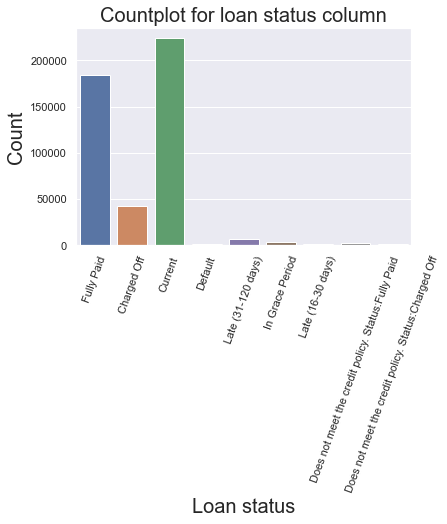

In [8]:
#creating a count plot for loan status column
sns.countplot(data = df, x = 'loan_status')
plt.title('Countplot for loan status column',size = 20)
plt.xticks(rotation = 70)
plt.xlabel('Loan status',size = 20)
plt.ylabel('Count',size = 20)
plt.show()

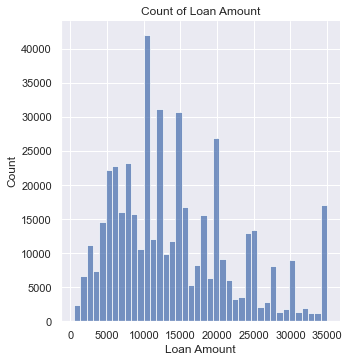

In [9]:
#Let's create a histogram of the loan_amnt column and see if there is anything we can understand from it.
sns.displot(x='loan_amnt', data=df, bins=40)
plt.title('Count of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.show()

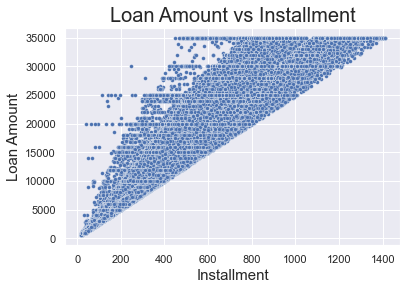

In [10]:
sns.scatterplot(x='installment', y='loan_amnt', data=df, s=15)
plt.title('Loan Amount vs Installment',size = 20)
plt.xlabel('Installment',size = 15)
plt.ylabel('Loan Amount',size = 15)
plt.show()

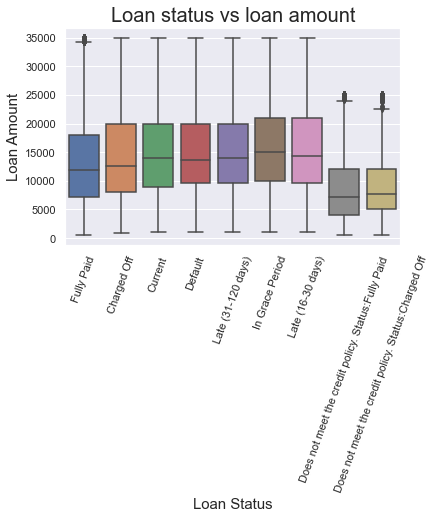

In [11]:
sns.boxplot(x='loan_status', y='loan_amnt', data=df)
plt.title('Loan status vs loan amount',size = 20)
plt.xlabel('Loan Status',size = 15)
plt.xticks(rotation = 70)
plt.ylabel('Loan Amount',size = 15)
plt.show()

## Converting data types of certain columns

Employment length column should be numeric

In [12]:
df.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [13]:
#emp_length column should be int but is of object type, we need to rectify this
df['emp_length_int'] = df['emp_length'].str.replace('\+ years','')
df['emp_length_int'] = df['emp_length_int'].str.replace('< 1 year','0')
df['emp_length_int'] = df['emp_length_int'].str.replace('n/a','0')
df['emp_length_int'] = df['emp_length_int'].str.replace(' years','')
df['emp_length_int'] = df['emp_length_int'].str.replace(' year','')
df.emp_length_int.unique()

array(['10', '0', '1', '3', '8', '9', '4', '5', '6', '2', '7', nan],
      dtype=object)

In [14]:
df.emp_length_int = pd.to_numeric(df.emp_length_int)
df.emp_length_int.dtype

dtype('float64')

---

Term column should also be numeric

In [15]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [16]:
df['term_int'] = df['term'].str.replace(' months','')
df['term_int'] = df['term_int'].str.strip()
df['term_int'].unique()

array(['36', '60'], dtype=object)

In [17]:
df['term_int'] = df['term_int'].astype(float)

---

Earliest credit line column should be of date type but is instead object

In [18]:
df['earliest_cr_line'].head()

0    Jan-85
1    Apr-99
2    Nov-01
3    Feb-96
4    Jan-96
Name: earliest_cr_line, dtype: object

Try running the cell below and see if it works, otherwise the same result is achieved by taking on a different process which is in the cells further below

Process 1:

In [19]:
# Assume we are now in December 2017
df['earliest_cr_line_date'] = pd.to_datetime(df['earliest_cr_line'], format = '%b-%y')
# Extracts the date and the time from a string variable that is in a given format.
df['months_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - df['earliest_cr_line_date']) / np.timedelta64(1, 'M')))
# We calculate the difference between two dates in months, turn it to numeric datatype and round it.
# We save the result in a new variable.
df['months_since_earliest_cr_line'].describe()
# Shows some descriptive statisics for the values of a column.

count    466256.000000
mean        239.482430
std          93.974829
min        -612.000000
25%         183.000000
50%         225.000000
75%         285.000000
max         587.000000
Name: months_since_earliest_cr_line, dtype: float64

In [20]:
from datetime import datetime

date_ref = datetime.strptime('2017-12-01','%Y-%m-%d')
df['ref_date'] = [date_ref]*len(df)

Process 2:

In [21]:
#df['earliest_cr_line_date'] = df['earliest_cr_line'][df.earliest_cr_line.isnull() == False].apply(lambda x: datetime.strptime(str(x),'%b-%y'))

#changing the column from dates to months since the date
#df['months_since_earliest_cr_line'] = (df.ref_date - df.earliest_cr_line_date)/np.timedelta64(1,'M')

#import math
#df['months_since_earliest_cr_line'] = df['months_since_earliest_cr_line'][df.months_since_earliest_cr_line.isnull() == False].apply(lambda x: math.floor(x))
#df['months_since_earliest_cr_line'].head()

#checking if values are in realistic range
#df['months_since_earliest_cr_line'].describe()

Evaluating the results of either of the above process

In [22]:
#negative values makes no sense, check what's going on
df.loc[:,['earliest_cr_line','earliest_cr_line_date','months_since_earliest_cr_line']][df['months_since_earliest_cr_line']<0]

,earliest_cr_line,earliest_cr_line_date,months_since_earliest_cr_line
1580,Sep-62,2062-09-01,-537.0
1770,Sep-68,2068-09-01,-609.0
2799,Sep-64,2064-09-01,-561.0
3282,Sep-67,2067-09-01,-597.0
3359,Feb-65,2065-02-01,-566.0
...,...,...,...
464003,Jan-68,2068-01-01,-601.0
464260,Jul-66,2066-07-01,-583.0
465100,Oct-67,2067-10-01,-598.0
465500,Sep-67,2067-09-01,-597.0


In [23]:
#we see the error, let's replace 2060s by 1960s
df.loc[:,'earliest_cr_line_date'][df['months_since_earliest_cr_line']<0]=df.loc[:,'earliest_cr_line_date'][df['months_since_earliest_cr_line']<0].apply(lambda x: x.replace(year = x.year - 100))

In [24]:
df['months_since_earliest_cr_line'] = (df.ref_date - df.earliest_cr_line_date)/np.timedelta64(1,'M')

#getting the floor value of months
import math
df['months_since_earliest_cr_line'] = df['months_since_earliest_cr_line'][df.months_since_earliest_cr_line.isnull() == False].apply(lambda x: math.floor(x))
# df['months_since_earliest_cr_line'].head()

#checking if values are in realistic range
df['months_since_earliest_cr_line'].describe()

count    466256.000000
mean        242.224158
std          86.944241
min          73.000000
25%         184.000000
50%         225.000000
75%         285.000000
max         887.000000
Name: months_since_earliest_cr_line, dtype: float64

---

Issue date column should also be date type

In [25]:
# Assume we are now in December 2017
df['issue_date'] = pd.to_datetime(df['issue_d'], format = '%b-%y')
# Extracts the date and the time from a string variable that is in a given format.
df['months_since_issue_date'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - df['issue_date']) / np.timedelta64(1, 'M')))
# We calculate the difference between two dates in months, turn it to numeric datatype and round it.
# We save the result in a new variable.
df['months_since_issue_date'].describe()
# Shows some descriptive statisics for the values of a column.

count    466285.000000
mean         51.255187
std          14.340154
min          36.000000
25%          41.000000
50%          47.000000
75%          57.000000
max         126.000000
Name: months_since_issue_date, dtype: float64

### Preprocessing disrcete variables

In [26]:
#creating dummy variables for a few of the discrete value columns
disc_columns = ['grade','sub_grade','home_ownership','verification_status','loan_status','purpose','addr_state','initial_list_status']

In [27]:
def create_dummies(columns,df):
    dummies = []
    for column in columns:
        dummies.append(pd.get_dummies(df[column], prefix = column, prefix_sep = ':',drop_first = True))
    dummies_data = pd.concat(dummies,axis = 1)
    return dummies_data

In [28]:
dummies_data = create_dummies(disc_columns, df)

In [29]:
df = pd.concat([df,dummies_data],axis = 1)

### Handling missing values

In [30]:
df.isnull().sum()

id                       0
member_id                0
loan_amnt                0
funded_amnt              0
funded_amnt_inv          0
                        ..
addr_state:WA            0
addr_state:WI            0
addr_state:WV            0
addr_state:WY            0
initial_list_status:w    0
Length: 199, dtype: int64

In [31]:
#imputing missing values
df['total_rev_hi_lim'].fillna(df['funded_amnt'], inplace = True)
df['total_rev_hi_lim'].isnull().sum()

0

In [32]:
#imputing missing values in annual income with the mean
df['annual_inc'].fillna(df['annual_inc'].mean(), inplace = True)
df['annual_inc'].isnull().sum()

0

In [33]:
#imputing 0 for the missing values in the following columns
zero_columns = ['months_since_earliest_cr_line','acc_now_delinq','total_acc','pub_rec','open_acc','inq_last_6mths','delinq_2yrs','emp_length_int']

for column in zero_columns:
    df[column].fillna(0,inplace = True)



In [34]:
df['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [35]:
df['good_bad'] = np.where(df['loan_status'].isin(['Default','Late (31-120 days)','Charged Off',
                                                  'Does not meet the credit policy. Status:Charged Off']),0,1)
#df['good_bad']

In [36]:
#splitting the data
from sklearn.model_selection import train_test_split
columns = df.columns
features = list(set(columns) - set(['good_bad']))
X = df[features]
Y = df['good_bad']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)

### Data preparation : calculating weight of evidence and information value for a column

### Preprocessing training data

In [37]:
inputs_prep = X_train
targets_prep = Y_train

In [38]:
inputs_prep['grade'].unique()

array(['B', 'A', 'E', 'C', 'D', 'F', 'G'], dtype=object)

In [39]:
#creating a function which will calculate the Weight of Evidence and Information value for each categorical column
def woe_discrete(df, feature, target_df):
    df1 = pd.concat([df[feature], target_df],axis = 1)
    
    #using groupby on the target data based on categories of the feature variable
    df1 = pd.concat([df1.groupby(df1.columns.values[0],as_index = False)[df1.columns.values[1]].count(),
                df1.groupby(df1.columns.values[0],as_index = False)[df1.columns.values[1]].sum()], axis = 1)
    
    #removing redundant columns and renaming columns
    df1 = df1.iloc[:,[0,1,3]]
    df1.columns = [df1.columns.values[0],'total_obs','good_obs']
    
    #finding number of bad loans
    df1['bad_obs'] = df1['total_obs'] - df1['good_obs']
    
    #finding proportion of observations in each category
    df1['total_obs_%'] = (df1['total_obs']/df1['total_obs'].sum())*100

    #calculating % of good and bad borrowers by category i.e., what % of total good and bad borrowers fall into each category
    df1['good_obs_%'] = (df1['good_obs']/df1['good_obs'].sum())*100
    df1['bad_obs_%'] = (df1['bad_obs']/df1['bad_obs'].sum())*100
    
    #calculating the weight of evidence of each category
    df1['WoE'] = np.log(df1['good_obs_%']/df1['bad_obs_%'])
    
    #sorting the dataframe by increasing weight of evidence
    df1 =df1.sort_values(['WoE'])
    df1 = df1.reset_index(drop = True)
    
    #calculating the absolute difference in proportion of good loans and WoE between successive categories
    df1['good_%_diff'] = df1['good_obs_%'].diff().abs()
    df1['WoE_diff'] = df1['WoE'].diff().abs()

    #calculaitng information value
    df1['Info_value'] = ((df1['good_obs_%'] - df1['bad_obs_%'])*df1['WoE']).sum()
    
    return df1

In [40]:
df_temp = woe_discrete(inputs_prep, 'grade', targets_prep)

In [41]:
df_temp

,grade,total_obs,good_obs,bad_obs,total_obs_%,good_obs_%,bad_obs_%,WoE,good_%_diff,WoE_diff,Info_value
0,G,2683,1925,758,0.719249,0.579418,1.857934,-1.165197,NaN,NaN,29.072415
1,F,10661,8109,2552,2.857962,2.440779,6.255209,-0.941097,1.861361,0.224099,29.072415
2,E,28575,22964,5611,7.660283,6.912079,13.753125,-0.687996,4.471300,0.253102,29.072415
3,D,61518,52046,9472,16.491523,15.665653,23.216824,-0.393407,8.753574,0.294589,29.072415
4,C,100274,88843,11431,26.881092,26.741414,28.018530,-0.046653,11.075761,0.346754,29.072415
5,B,109561,100896,8665,29.370717,30.369322,21.238786,0.357604,3.627908,0.404257,29.072415
6,A,59756,57447,2309,16.019173,17.291334,5.659591,1.116854,13.077988,0.759250,29.072415


### visualising results of data preparation

In [42]:
#creating a function which will plot the Weight of Evidence for each category in a column
def plot_by_woe(df,rotation = 0):
    x = np.array(df.iloc[:,0]) #converting into an ndarray because matplotlib doesn't work too well with df and strings
    y = df['WoE']
    plt.figure(figsize = (20,8))
    plt.plot(x,y, 'o--', c = 'Black')
    plt.xlabel(df.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title('Weight of Evidence for ' + str(df.columns[0]), size = 15)
    plt.xticks(rotation = rotation)

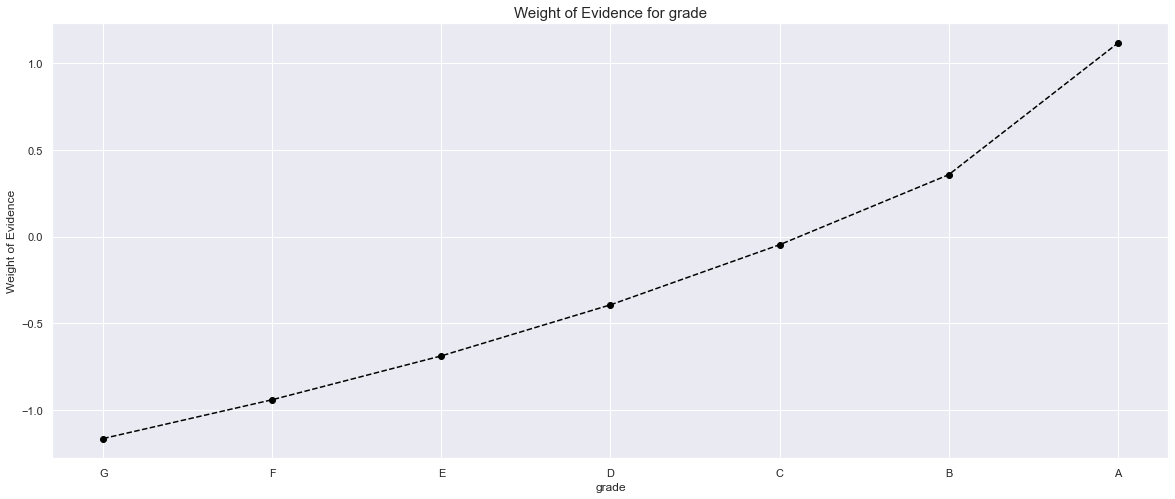

In [43]:
plot_by_woe(df_temp)

### preprocessing discrete variables : creating dummy variables

In [44]:
#for home ownership column
df_temp = woe_discrete(inputs_prep, 'home_ownership', targets_prep)
df_temp

,home_ownership,total_obs,good_obs,bad_obs,total_obs_%,good_obs_%,bad_obs_%,WoE,good_%_diff,WoE_diff,Info_value
0,OTHER,141,108,33,0.037799,0.032508,0.080886,-0.911571,NaN,NaN,inf
1,NONE,37,30,7,0.009919,0.009030,0.017158,-0.641907,0.023478,0.269664,inf
2,RENT,150918,131844,19074,40.457553,39.684556,46.752292,-0.163901,39.675526,0.478006,inf
3,OWN,33392,29779,3613,8.951607,8.963369,8.855826,0.012071,30.721187,0.175972,inf
4,MORTGAGE,188539,170468,18071,50.542855,51.310237,44.293838,0.147045,42.346868,0.134974,inf
5,ANY,1,1,0,0.000268,0.000301,0.000000,inf,51.309936,inf,inf


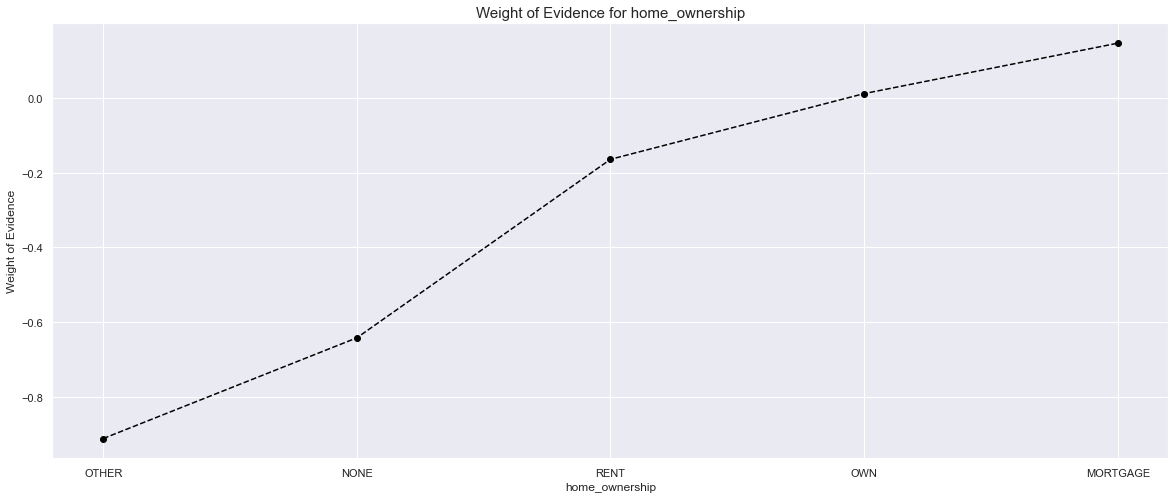

In [45]:
plot_by_woe(df_temp)

In [47]:
# we see that other, none and any categories are heavily underrepresented 
# so it is best to combine these 3 categories with the riskiest category having enough representation i.e., the rent category
if ['home_ownership:ANY'] in inputs_prep.columns.values:
    pass
else:
    inputs_prep['home_ownership:ANY'] = np.where(inputs_prep['home_ownership']=='ANY',1,0)
inputs_prep['home_ownership:RENT_OTHER_ANY_NONE'] = sum([inputs_prep['home_ownership:RENT'],inputs_prep['home_ownership:OTHER'],inputs_prep['home_ownership:NONE'],inputs_prep['home_ownership:ANY']])

In [48]:
#looking at some advanced methods for creating dummies
(df['addr_state'].unique()) #total 50 categories

array(['AZ', 'GA', 'IL', 'CA', 'OR', 'NC', 'TX', 'VA', 'MO', 'CT', 'UT',
       'FL', 'NY', 'PA', 'MN', 'NJ', 'KY', 'OH', 'SC', 'RI', 'LA', 'MA',
       'WA', 'WI', 'AL', 'CO', 'KS', 'NV', 'AK', 'MD', 'WV', 'VT', 'MI',
       'DC', 'SD', 'NH', 'AR', 'NM', 'MT', 'HI', 'WY', 'OK', 'DE', 'MS',
       'TN', 'IA', 'NE', 'ID', 'IN', 'ME'], dtype=object)

In [49]:
df_temp = woe_discrete(inputs_prep, 'addr_state', targets_prep)

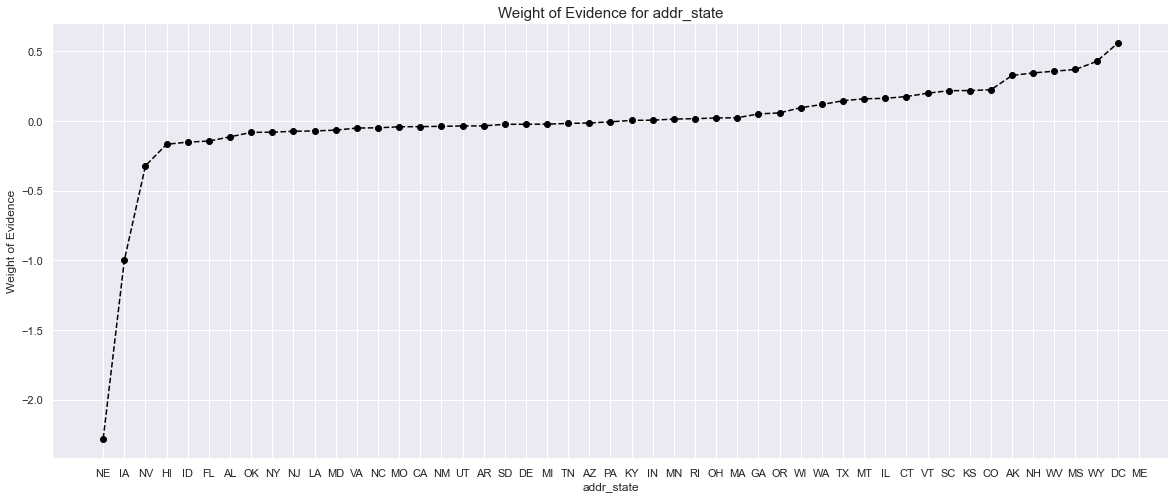

In [50]:
plot_by_woe(df_temp)

In [59]:
if ['addr_state:ND'] in inputs_prep.columns.values:
    pass
else:
    inputs_prep['addr_state:ND'] = np.where(inputs_prep['addr_state']=='ND',1,0)
    
if ['addr_state:AK'] in inputs_prep.columns.values:
    pass
else:
    inputs_prep['addr_state:AK'] = np.where(inputs_prep['addr_state']=='AK',1,0)

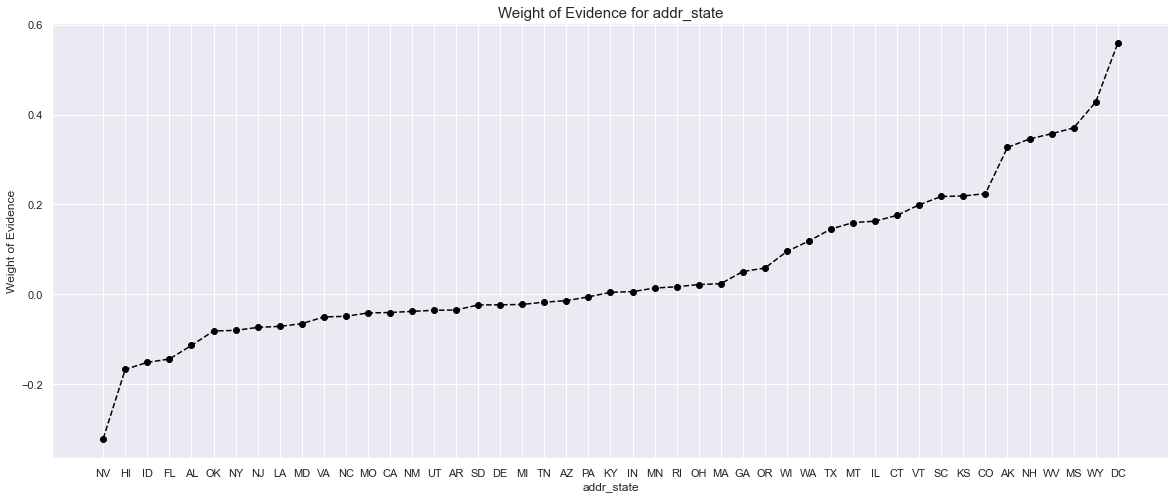

In [52]:
plot_by_woe(df_temp.iloc[2:-1])

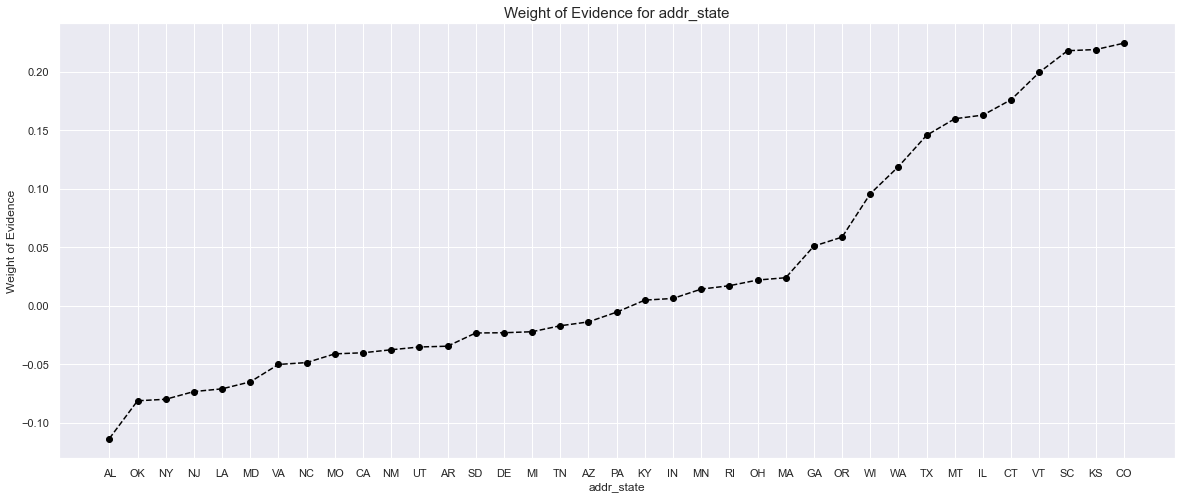

In [53]:
plot_by_woe(df_temp[6:43])

In [54]:
df_temp[36:]

,addr_state,total_obs,good_obs,bad_obs,total_obs_%,good_obs_%,bad_obs_%,WoE,good_%_diff,WoE_diff,Info_value
36,MT,1087,984,103,0.291399,0.296180,0.252463,0.159702,7.653433,0.014163,inf
37,IL,14933,13522,1411,4.003185,4.070072,3.458503,0.162825,3.773892,0.003122,inf
38,CT,5698,5166,532,1.527499,1.554947,1.303985,0.176016,2.515125,0.013191,inf
39,VT,733,666,67,0.196500,0.200464,0.164224,0.199403,1.354483,0.023387,inf
40,SC,4439,4040,399,1.189991,1.216025,0.977989,0.217844,1.015562,0.018442,inf
41,KS,3285,2990,295,0.880631,0.899979,0.723075,0.218859,0.316046,0.001015,inf
42,CO,7800,7103,697,2.090996,2.137977,1.708417,0.224293,1.237998,0.005434,inf
43,AK,1008,926,82,0.270221,0.278723,0.200990,0.326961,1.859254,0.102668,inf
44,NH,1776,1634,142,0.476104,0.491828,0.348056,0.345765,0.213105,0.018804,inf
45,WV,1909,1758,151,0.511758,0.529151,0.370116,0.357458,0.037324,0.011693,inf


In [60]:
# now we have to create dummy variables by combining existing variables based on no. of observations and weight of evidence
inputs_prep['addr_state:NE_IA_NV_ND_HI_ID_FL'] = sum([inputs_prep['addr_state:NE'],inputs_prep['addr_state:IA'],
                                                     inputs_prep['addr_state:NV'],inputs_prep['addr_state:ND'],
                                                     inputs_prep['addr_state:HI'],inputs_prep['addr_state:ID'],
                                                     inputs_prep['addr_state:FL']]) #adding ND to the this category as it is absent

inputs_prep['addr_state:AL_OK'] = sum([inputs_prep['addr_state:AL'],inputs_prep['addr_state:OK']])

#separate category for NY as it hhas substantial number of observations(that category is already present)
inputs_prep['addr_state:NJ_LA_MD'] = sum([inputs_prep['addr_state:NJ'],inputs_prep['addr_state:LA'],inputs_prep['addr_state:MD']])

inputs_prep['addr_state:VA_NC_MO'] = sum([inputs_prep['addr_state:VA'],inputs_prep['addr_state:NC'],inputs_prep['addr_state:MO']])

#Separate category already exists for CA
inputs_prep['addr_state:NM_UT_AR_SD_DE_MI'] = sum([inputs_prep['addr_state:NM'],inputs_prep['addr_state:UT'],
                                                  inputs_prep['addr_state:AR'],inputs_prep['addr_state:SD'],
                                                  inputs_prep['addr_state:DE'],inputs_prep['addr_state:MI']])

inputs_prep['addr_state:TN_AZ'] = sum([inputs_prep['addr_state:TN'],inputs_prep['addr_state:AZ']])

#Separate category for PA
inputs_prep['addr_state:KY_IN'] = sum([inputs_prep['addr_state:KY'],inputs_prep['addr_state:IN']])
                                                                     
inputs_prep['addr_state:MN_RI_OH_MA'] = sum([inputs_prep['addr_state:MN'],inputs_prep['addr_state:RI'],
                                            inputs_prep['addr_state:OH'],inputs_prep['addr_state:MA']])

inputs_prep['addr_state:GA_OR'] = sum([inputs_prep['addr_state:GA'],inputs_prep['addr_state:OR']])

inputs_prep['addr_state:WI_WA'] = sum([inputs_prep['addr_state:WI'],inputs_prep['addr_state:WA']])

#Separate category for TX
inputs_prep['addr_state:MT_IL_CT'] = sum([inputs_prep['addr_state:MT'],inputs_prep['addr_state:IL'],inputs_prep['addr_state:CT']])

inputs_prep['addr_state:VT_SC_KS_CO'] = sum([inputs_prep['addr_state:VT'],inputs_prep['addr_state:SC'],
                                            inputs_prep['addr_state:KS'],inputs_prep['addr_state:CO']])

inputs_prep['addr_state:AK_NH_WV_MS_WY_DC_ME'] = sum([inputs_prep['addr_state:AK'],inputs_prep['addr_state:DC'],
                                                     inputs_prep['addr_state:NH'],inputs_prep['addr_state:WY'],
                                                     inputs_prep['addr_state:WV'],inputs_prep['addr_state:MS'],
                                                     inputs_prep['addr_state:ME']])


In [61]:
#working with verification status column
df['verification_status'].unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [62]:
df_temp = woe_discrete(inputs_prep, 'verification_status', targets_prep)
df_temp

,verification_status,total_obs,good_obs,bad_obs,total_obs_%,good_obs_%,bad_obs_%,WoE,good_%_diff,WoE_diff,Info_value
0,Verified,134466,117297,17169,36.047160,35.305963,42.082945,-0.175591,NaN,NaN,2.138517
1,Source Verified,120129,107625,12504,32.203749,32.394727,30.648561,0.055410,2.911236,0.231001,2.138517
2,Not Verified,118433,107308,11125,31.749091,32.299311,27.268494,0.169314,0.095416,0.113904,2.138517


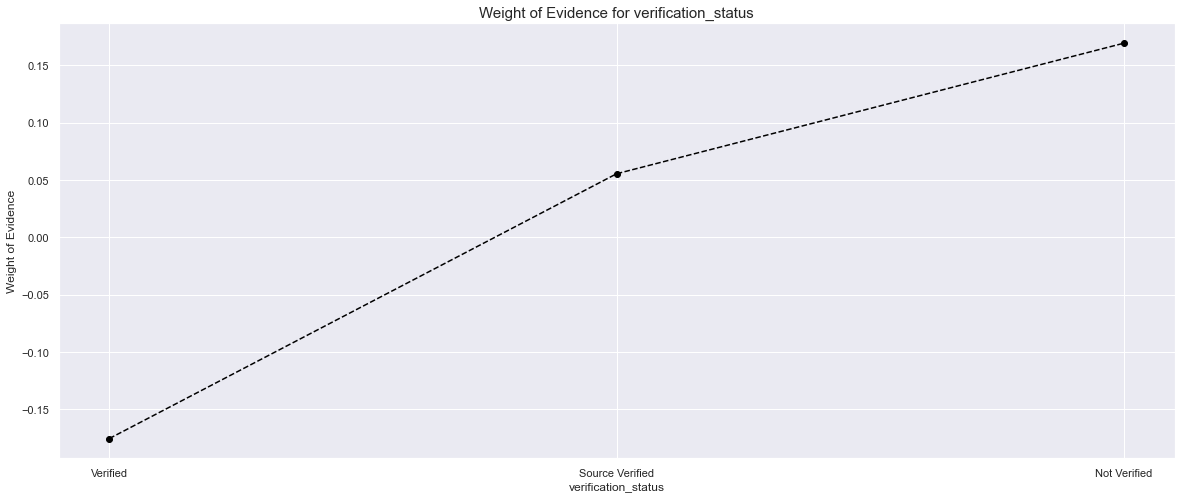

In [63]:
plot_by_woe(df_temp)

In [56]:
#checking purpose column
df['purpose'].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [57]:
df_temp = woe_discrete(inputs_prep, 'purpose', targets_prep)
df_temp

,purpose,total_obs,good_obs,bad_obs,total_obs_%,good_obs_%,bad_obs_%,WoE,good_%_diff,WoE_diff,Info_value
0,small_business,5551,4345,1206,1.488092,1.307829,2.956027,-0.815478,NaN,NaN,3.822971
1,educational,329,259,70,0.088197,0.077958,0.171577,-0.788862,1.229871,0.026616,3.822971
2,moving,2398,2005,393,0.642847,0.603498,0.963283,-0.467605,0.525540,0.321257,3.822971
3,renewable_energy,294,250,44,0.078814,0.075249,0.107848,-0.359923,0.528249,0.107682,3.822971
4,other,19028,16373,2655,5.100958,4.928212,6.507672,-0.278005,4.852963,0.081918,3.822971
5,house,1806,1565,241,0.484146,0.471059,0.590715,-0.226350,4.457153,0.051655,3.822971
6,medical,3687,3195,492,0.988398,0.961683,1.205941,-0.226331,0.490624,0.000019,3.822971
7,wedding,1851,1625,226,0.496209,0.489119,0.553949,-0.124466,0.472564,0.101864,3.822971
8,vacation,2007,1767,240,0.538029,0.531860,0.588264,-0.100795,0.042741,0.023671,3.822971
9,debt_consolidation,219066,194274,24792,58.726423,58.475755,60.767685,-0.038446,57.943894,0.062349,3.822971


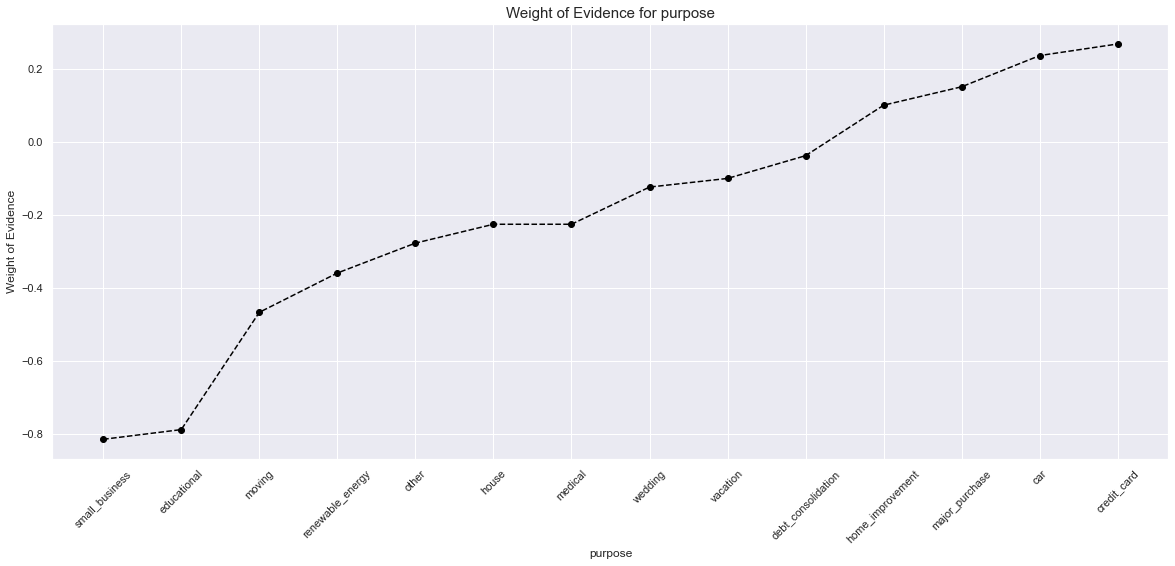

In [58]:
plot_by_woe(df_temp,rotation=45)

In [68]:
if ['purpose:car'] in inputs_prep.columns.values:
    pass
else:
    inputs_prep['purpose:car'] = np.where(inputs_prep['purpose']=='car',1,0)

In [69]:
#combining categories
inputs_prep['purpose:small-business_educational_moving_renewable-energy_other'] = sum([inputs_prep['purpose:small_business'],
                                                                                        inputs_prep['purpose:educational'],
                                                                                        inputs_prep['purpose:moving'],
                                                                                        inputs_prep['purpose:renewable_energy'],
                                                                                      inputs_prep['purpose:other']])

inputs_prep['purpose:house_medical_wedding_vacation'] = sum([inputs_prep['purpose:house'],inputs_prep['purpose:medical'],
                                                            inputs_prep['purpose:wedding'],inputs_prep['purpose:vacation']])

#separate category for debt consolidation
inputs_prep['purpose:home-improvement_major-purchase_car'] = sum([inputs_prep['purpose:home_improvement'],inputs_prep['purpose:car'],
                                                                 inputs_prep['purpose:major_purchase']])
#separate category for credit card

In [70]:
#checking initial list status column
df['initial_list_status'].unique()

array(['f', 'w'], dtype=object)

In [71]:
df_temp = woe_discrete(inputs_prep,'initial_list_status',targets_prep)
df_temp

,initial_list_status,total_obs,good_obs,bad_obs,total_obs_%,good_obs_%,bad_obs_%,WoE,good_%_diff,WoE_diff,Info_value
0,f,242385,213240,29145,64.977696,64.184451,71.437325,-0.107060,NaN,NaN,2.41768
1,w,130643,118990,11653,35.022304,35.815549,28.562675,0.226281,28.368901,0.333341,2.41768


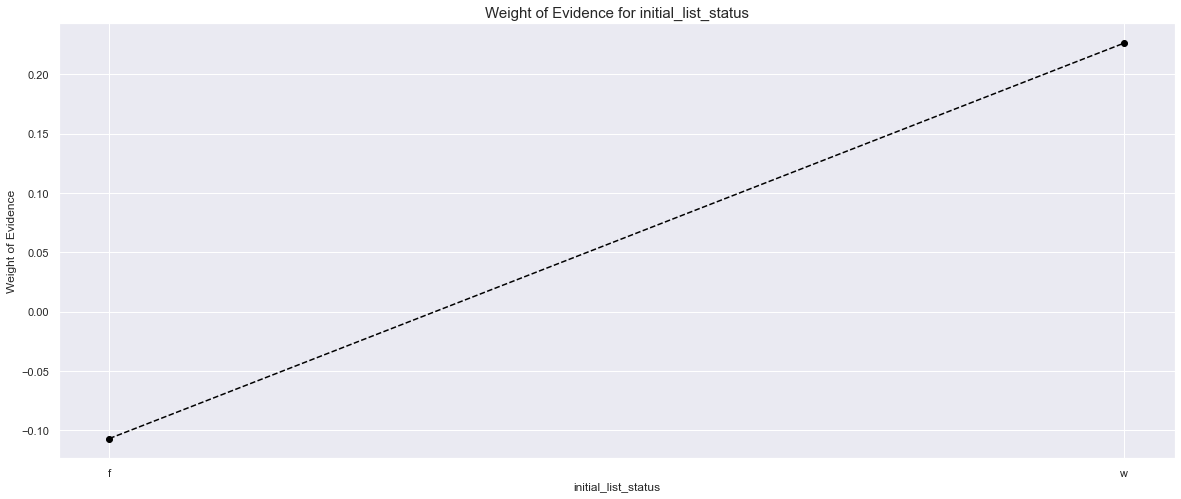

In [72]:
plot_by_woe(df_temp)

### Preprocessing continuous variables: automating calculations and visualising results

In [73]:
def woe_ordered_continuous(df, feature, target_df):
    df1 = pd.concat([df[feature], target_df],axis = 1)
    
    #using groupby on the target data based on categories of the feature variable
    df1 = pd.concat([df1.groupby(df1.columns.values[0],as_index = False)[df1.columns.values[1]].count(),
                df1.groupby(df1.columns.values[0],as_index = False)[df1.columns.values[1]].sum()], axis = 1)
    
    #removing redundant columns and renaming columns
    df1 = df1.iloc[:,[0,1,3]]
    df1.columns = [df1.columns.values[0],'total_obs','good_obs']
    
    #finding number of bad loans
    df1['bad_obs'] = df1['total_obs'] - df1['good_obs']
    
    #finding proportion of observations in each category
    df1['total_obs_%'] = (df1['total_obs']/df1['total_obs'].sum())*100

    #calculating % of good and bad borrowers by category i.e., what % of total good and bad borrowers fall into each category
    df1['good_obs_%'] = (df1['good_obs']/df1['good_obs'].sum())*100
    df1['bad_obs_%'] = (df1['bad_obs']/df1['bad_obs'].sum())*100
    
    #calculating the weight of evidence of each category
    df1['WoE'] = np.log(df1['good_obs_%']/df1['bad_obs_%'])
    
    #calculating the absolute difference in proportion of good loans and WoE between successive categories
    df1['good_%_diff'] = df1['good_obs_%'].diff().abs()
    df1['WoE_diff'] = df1['WoE'].diff().abs()

    #calculaitng information value
    df1['Info_value'] = ((df1['good_obs_%'] - df1['bad_obs_%'])*df1['WoE']).sum()
    
    return df1

In [74]:
#checking the term_int variable
inputs_prep['term_int'].unique()

array([36., 60.])

In [75]:
df_temp = woe_ordered_continuous(inputs_prep,'term_int',targets_prep)
#df_temp

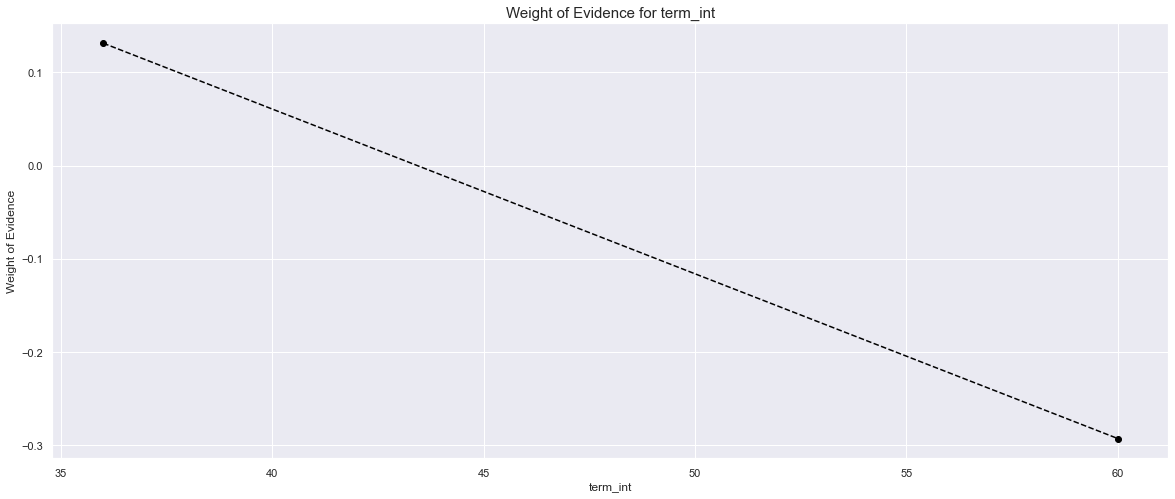

In [76]:
plot_by_woe(df_temp)

In [77]:
#creating dummies for term_int variable
inputs_prep['term_int:36'] = np.where(inputs_prep['term_int'] == 36,1,0)
inputs_prep['term_int:60'] = np.where(inputs_prep['term_int'] == 60,1,0)

In [78]:
#checking the emp_length_int variable
df['emp_length_int'].unique()

array([10.,  0.,  1.,  3.,  8.,  9.,  4.,  5.,  6.,  2.,  7.])

In [79]:
df_temp = woe_ordered_continuous(inputs_prep, 'emp_length_int',targets_prep)
#df_temp

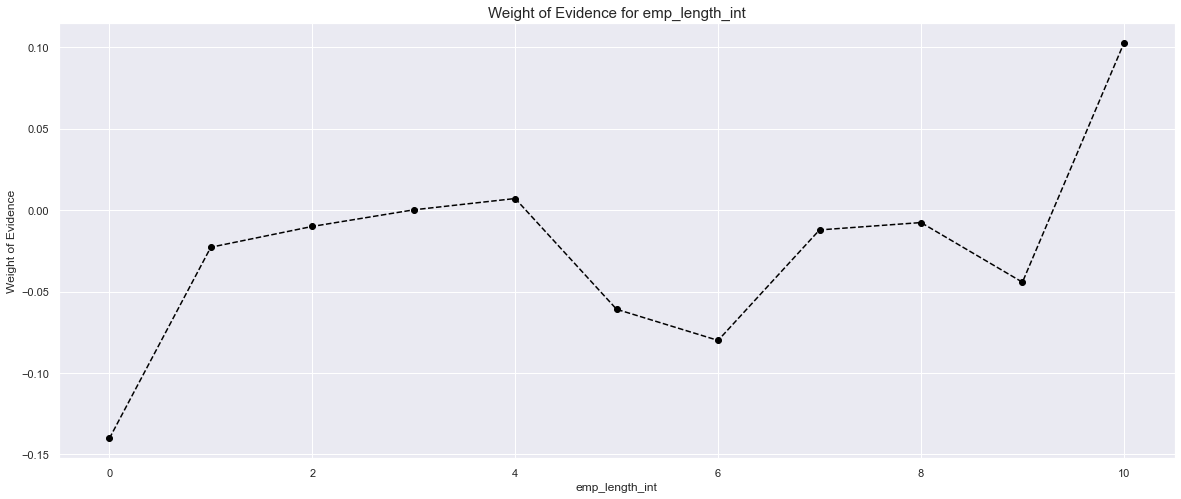

In [80]:
plot_by_woe(df_temp)

In [81]:
#creating dummies for emp_length_int variable
inputs_prep['emp_length_int:0'] = np.where(inputs_prep['emp_length_int'].isin([0]),1,0)
inputs_prep['emp_length_int:1'] = np.where(inputs_prep['emp_length_int'].isin([1]),1,0)
inputs_prep['emp_length_int:2_3_4'] = np.where(inputs_prep['emp_length_int'].isin([2,3,4]),1,0)
inputs_prep['emp_length_int:5_6'] = np.where(inputs_prep['emp_length_int'].isin([5,6]),1,0)
inputs_prep['emp_length_int:7_8'] = np.where(inputs_prep['emp_length_int'].isin([7,8]),1,0)
inputs_prep['emp_length_int:9'] = np.where(inputs_prep['emp_length_int'].isin([9]),1,0)
inputs_prep['emp_length_int:10'] = np.where(inputs_prep['emp_length_int'].isin([10]),1,0)

In [82]:
df['months_since_issue_date'].unique()

array([ 72.,  73.,  74.,  75.,  76.,  77.,  78.,  79.,  80.,  81.,  82.,
        83.,  84.,  85.,  86.,  87.,  88.,  89.,  90.,  91.,  92.,  93.,
        94.,  95.,  96.,  97.,  98.,  99., 100., 101., 102., 103., 104.,
       105., 106., 107., 108., 109., 110., 111., 112., 113., 114., 115.,
       116., 117., 118., 119., 120., 121., 122., 123., 124., 125., 126.,
        48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,  56.,  57.,  58.,
        59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.,  69.,
        70.,  71.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.])

In [83]:
inputs_prep['months_since_issue_date_factor'] = pd.cut(inputs_prep['months_since_issue_date'], 50)
x = list(inputs_prep['months_since_issue_date_factor'].unique())
y = []
for i in sorted(x):
    y.append(str(i))
    
"""this y is then passed as the labels argument. We had to do this because there was some difficulty plotting the graph
with entries on x axis being intervals and converting those intervals into str object solves that issue"""


'this y is then passed as the labels argument. We had to do this because there was some difficulty plotting the graph\nwith entries on x axis being intervals and converting those intervals into str object solves that issue'

In [84]:
#fine classing this variable using pd.cut
inputs_prep['months_since_issue_date_factor'] = pd.cut(inputs_prep['months_since_issue_date'], 50, labels = y)

In [85]:
df_temp = woe_ordered_continuous(inputs_prep, 'months_since_issue_date_factor', targets_prep)
#df_temp

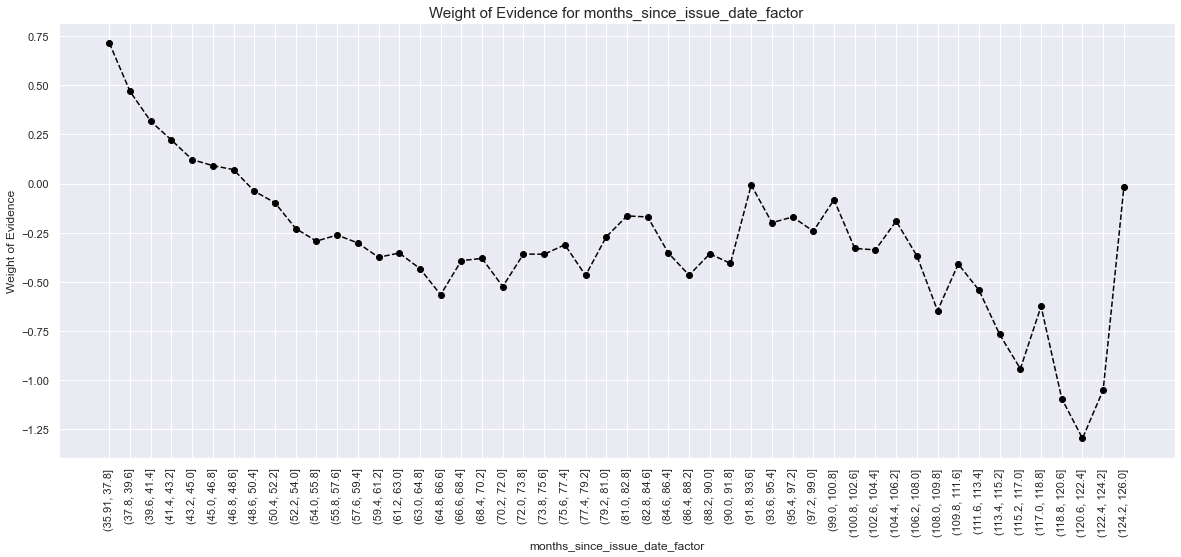

In [86]:
plot_by_woe(df_temp,90)

In [87]:
#creating dummies
inputs_prep['months_since_issue_date:<38'] = np.where(inputs_prep['months_since_issue_date'] < 38,1,0)
inputs_prep['months_since_issue_date:38-39'] = np.where(inputs_prep['months_since_issue_date'].isin(range(38,40)),1,0)
inputs_prep['months_since_issue_date:40-41'] = np.where(inputs_prep['months_since_issue_date'].isin(range(40,42)),1,0)
inputs_prep['months_since_issue_date:42-43'] = np.where(inputs_prep['months_since_issue_date'].isin(range(42,44)),1,0)
inputs_prep['months_since_issue_date:44-48'] = np.where(inputs_prep['months_since_issue_date'].isin(range(44,49)),1,0)
inputs_prep['months_since_issue_date:49-52'] = np.where(inputs_prep['months_since_issue_date'].isin(range(49,53)),1,0)
inputs_prep['months_since_issue_date:53-59'] = np.where(inputs_prep['months_since_issue_date'].isin(range(53,60)),1,0)
inputs_prep['months_since_issue_date:60-64'] = np.where(inputs_prep['months_since_issue_date'].isin(range(60,65)),1,0)
inputs_prep['months_since_issue_date:65-84'] = np.where(inputs_prep['months_since_issue_date'].isin(range(65,85)),1,0)
inputs_prep['months_since_issue_date:>84'] = np.where(inputs_prep['months_since_issue_date']>84,1,0)

In [88]:
#working on interest rate column
inputs_prep['int_rate_factor'] = pd.cut(inputs_prep['int_rate'],50)

In [89]:
a = list(inputs_prep['int_rate_factor'].unique())
b = []
for i in sorted(a):
    b.append(str(i))
    
inputs_prep['int_rate_factor'] = pd.cut(inputs_prep['int_rate'], 50, labels = b)

In [90]:
df_temp = woe_ordered_continuous(inputs_prep, 'int_rate_factor', targets_prep)
#df_temp

In [91]:
#plot_by_woe(df_temp,90)

In [92]:
#creating dummies
inputs_prep['int_rate:<=9.548'] = np.where(inputs_prep['int_rate'] <= 9.548,1,0)
inputs_prep['int_rate:9.548-12.025'] = np.where((inputs_prep['int_rate'] > 9.548) & (inputs_prep['int_rate']<=12.025),1,0)
inputs_prep['int_rate:12.025-15.74'] = np.where((inputs_prep['int_rate'] > 12.025) & (inputs_prep['int_rate']<=15.74),1,0)
inputs_prep['int_rate:15.74-20.281'] = np.where((inputs_prep['int_rate'] > 15.74) & (inputs_prep['int_rate']<=20.281),1,0)
inputs_prep['int_rate:>20.281'] = np.where(inputs_prep['int_rate'] > 20.281,1,0)

In [93]:
#working on funded_amnt column
inputs_prep['funded_amnt_factor'] = pd.cut(inputs_prep['funded_amnt'],50)

In [94]:
c = list(inputs_prep['funded_amnt_factor'].unique())
d = []
for i in sorted(c):
    d.append(str(i))
    
inputs_prep['funded_amnt_factor'] = pd.cut(inputs_prep['funded_amnt'],50, labels = d)

In [95]:
df_temp = woe_ordered_continuous(inputs_prep, 'funded_amnt_factor',targets_prep)
#df_temp

In [96]:
#plot_by_woe(df_temp,90)

Since the weight of evidence fluctuates rapidly and the common trend line is nearly horizontal, we conclude that
there is no clear cut association between funded_amnt and weight of evidence. Hence, we shall not include this column in our model

In [97]:
#preprocessing months_since_earliest_cr_line column
inputs_prep['months_since_earliest_cr_line_factor']=pd.cut(inputs_prep['months_since_earliest_cr_line'],50)

In [98]:
df_temp = woe_ordered_continuous(inputs_prep,'months_since_earliest_cr_line_factor',targets_prep)
#df_temp

In [99]:
x = list(df_temp.iloc[:,0])
y = []
for i in x:
    y.append(str(i))
len(y)

inputs_prep['months_since_earliest_cr_line_factor'] = pd.cut(inputs_prep['months_since_earliest_cr_line'],50,labels = y)

In [100]:
df_temp = woe_ordered_continuous(inputs_prep, 'months_since_earliest_cr_line_factor',targets_prep)
#df_temp

In [101]:
#plot_by_woe(df_temp[8:],90)

In [102]:
#creating dummies
inputs_prep['months_since_earliest_cr_line:<142'] = np.where(inputs_prep['months_since_earliest_cr_line']<142,1,0)
inputs_prep['months_since_earliest_cr_line:142-230'] = np.where(inputs_prep['months_since_earliest_cr_line'].isin(range(142,231)),1,0)
inputs_prep['months_since_earliest_cr_line:231-266'] = np.where(inputs_prep['months_since_earliest_cr_line'].isin(range(231,267)),1,0)
inputs_prep['months_since_earliest_cr_line:267-354'] = np.where(inputs_prep['months_since_earliest_cr_line'].isin(range(267,355)),1,0)
inputs_prep['months_since_earliest_cr_line:355-549'] = np.where(inputs_prep['months_since_earliest_cr_line'].isin(range(355,550)),1,0)
inputs_prep['months_since_earliest_cr_line:>=550'] = np.where(inputs_prep['months_since_earliest_cr_line']>=550,1,0)

In [103]:
#working on installment column
inputs_prep['installment_factor'] = pd.cut(inputs_prep['installment'],50)

In [104]:
x = list(inputs_prep['installment_factor'].unique())
y = []
for i in sorted(x):
    y.append(str(i))

inputs_prep['installment_factor'] = pd.cut(inputs_prep['installment'], 50, labels =y)

In [105]:
df_temp = woe_ordered_continuous(inputs_prep, 'installment_factor', targets_prep)
#df_temp

In [106]:
#plot_by_woe(df_temp,90)

Not enough importance seems to be available in this column and hence, we are not creating dummies

In [107]:
#working on delinq_2yrs column
len(inputs_prep['delinq_2yrs'].unique())
#no need for fine classing

23

In [108]:
df_temp = woe_ordered_continuous(inputs_prep, 'delinq_2yrs',targets_prep)
#df_temp

In [109]:
#plot_by_woe(df_temp)

In [110]:
#creating dummies
inputs_prep['delinq_2yrs:0'] = np.where(inputs_prep['delinq_2yrs']==0,1,0)
inputs_prep['delinq_2yrs:1-3'] = np.where((inputs_prep['delinq_2yrs']>0) & (inputs_prep['delinq_2yrs']<=3),1,0)
inputs_prep['delinq_2yrs:>3'] = np.where(inputs_prep['delinq_2yrs']>3,1,0)

In [111]:
#working on inq_last_6mths column
inputs_prep['inq_last_6mths'].unique()
#no need for fine classing

array([ 0.,  2.,  1.,  3.,  4.,  5.,  6.,  9.,  7.,  8., 10., 11., 12.,
       14., 15., 13., 28., 16., 32., 18., 27., 19., 17., 31., 24., 33.,
       25.])

In [112]:
df_temp = woe_ordered_continuous(inputs_prep,'inq_last_6mths',targets_prep)
#df_temp

In [113]:
#plot_by_woe(df_temp)

In [114]:
#creating dummies
inputs_prep['inq_last_6mths:0'] = np.where(inputs_prep['inq_last_6mths']==0,1,0)
inputs_prep['inq_last_6mths:1'] = np.where(inputs_prep['inq_last_6mths']==1,1,0)
inputs_prep['inq_last_6mths:2'] = np.where(inputs_prep['inq_last_6mths']==2,1,0)
inputs_prep['inq_last_6mths:3-5'] = np.where(inputs_prep['inq_last_6mths'].isin(range(3,6)),1,0)
inputs_prep['inq_last_6mths:>=6'] = np.where(inputs_prep['inq_last_6mths']>=6,1,0)

In [115]:
#working on open_acc column
len(inputs_prep['open_acc'].unique())

60

In [116]:
df_temp = woe_ordered_continuous(inputs_prep,'open_acc',targets_prep)
#df_temp

In [117]:
#plot_by_woe(df_temp)

In [118]:
#plot_by_woe(df_temp[4:31])

In [119]:
#creating dummies
inputs_prep['open_acc:0'] = np.where((inputs_prep['open_acc'] == 0), 1, 0)
inputs_prep['open_acc:1-3'] = np.where((inputs_prep['open_acc'] >= 1) & (inputs_prep['open_acc'] <= 3), 1, 0)
inputs_prep['open_acc:4-12'] = np.where((inputs_prep['open_acc'] >= 4) & (inputs_prep['open_acc'] <= 12), 1, 0)
inputs_prep['open_acc:13-17'] = np.where((inputs_prep['open_acc'] >= 13) & (inputs_prep['open_acc'] <= 17), 1, 0)
inputs_prep['open_acc:18-22'] = np.where((inputs_prep['open_acc'] >= 18) & (inputs_prep['open_acc'] <= 22), 1, 0)
inputs_prep['open_acc:23-25'] = np.where((inputs_prep['open_acc'] >= 23) & (inputs_prep['open_acc'] <= 25), 1, 0)
inputs_prep['open_acc:26-30'] = np.where((inputs_prep['open_acc'] >= 26) & (inputs_prep['open_acc'] <= 30), 1, 0)
inputs_prep['open_acc:>=31'] = np.where((inputs_prep['open_acc'] >= 31), 1, 0)

In [120]:
#working on pub_rec column
inputs_prep['pub_rec'].unique()

array([ 0.,  1.,  6.,  3.,  2.,  5.,  4., 11., 10.,  7.,  9., 21., 49.,
        8., 18., 16., 13., 40., 15., 54., 14., 63.])

In [121]:
df_temp = woe_ordered_continuous(inputs_prep,'pub_rec',targets_prep)
#df_temp

In [122]:
#plot_by_woe(df_temp[1:])

In [123]:
#creating dummies
inputs_prep['pub_rec:0']=np.where(inputs_prep['pub_rec']==0,1,0)
inputs_prep['pub_rec:1-2']=np.where((inputs_prep['pub_rec'].isin(range(1,3))),1,0)
inputs_prep['pub_rec:3-5']=np.where((inputs_prep['pub_rec'].isin(range(3,6))),1,0)
inputs_prep['pub_rec:>=6']=np.where(inputs_prep['pub_rec']>=6,1,0)

In [124]:
#working on total_acc column
sorted(inputs_prep['total_acc'].unique())

[0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 85.0,
 86.0,
 87.0,
 88.0,
 89.0,
 90.0,
 91.0,
 92.0,
 93.0,
 94.0,
 95.0,
 96.0,
 97.0,
 98.0,
 99.0,
 100.0,
 101.0,
 102.0,
 105.0,
 106.0,
 116.0,
 117.0,
 118.0,
 119.0,
 121.0,
 124.0,
 150.0,
 156.0]

In [125]:
#fine classing
inputs_prep['total_acc_factor'] = pd.cut(inputs_prep['total_acc'],50)

In [126]:
df_temp = woe_ordered_continuous(inputs_prep,'total_acc_factor',targets_prep)
#df_temp

In [127]:
x = list(df_temp.iloc[:,0])
y = []
for i in x:
    y.append(str(i))

inputs_prep['total_acc_factor'] = pd.cut(inputs_prep['total_acc'],50,labels = y)

In [128]:
df_temp = woe_ordered_continuous(inputs_prep,'total_acc_factor',targets_prep)
#df_temp[:9]

In [129]:
#plot_by_woe(df_temp[0:9],90)

In [130]:
#creating dummies
inputs_prep['total_acc:<=15'] = np.where(inputs_prep['total_acc']<=15,1,0)
inputs_prep['total_acc:16-28'] = np.where(inputs_prep['total_acc'].isin(range(16,29)),1,0)
inputs_prep['total_acc:29-49'] = np.where(inputs_prep['total_acc'].isin(range(29,50)),1,0)
inputs_prep['total_acc:>=50'] = np.where(inputs_prep['total_acc']>=50,1,0)

In [131]:
#working on acc_now_delinq column
inputs_prep['acc_now_delinq'].unique()

array([0., 1., 2., 3., 4., 5.])

In [132]:
df_temp = woe_ordered_continuous(inputs_prep, 'acc_now_delinq',targets_prep)
#df_temp

In [133]:
#plot_by_woe(df_temp)

In [134]:
#creating dummies
inputs_prep['acc_now_delinq:0'] = np.where(inputs_prep['acc_now_delinq']==0,1,0)
inputs_prep['acc_now_delinq:>=1'] = np.where(inputs_prep['acc_now_delinq']!=0,1,0)

### preprocessing the annual income column

In [135]:
#making fine classes
inputs_prep['annual_inc_factor'] = pd.cut(inputs_prep['annual_inc'],50)
df_temp = woe_ordered_continuous(inputs_prep,'annual_inc_factor',targets_prep)
#df_temp

In [136]:
#since more than 95% values lie in the first class itself, we probably need more classes to do anything useful
#let's try 100 fine classes
inputs_prep['annual_inc_factor'] = pd.cut(inputs_prep['annual_inc'],100)
df_temp = woe_ordered_continuous(inputs_prep,'annual_inc_factor',targets_prep)
#df_temp

In [137]:
#still more than 95% values are in the first 2 classes
#let's split the data into higher and lower income groups, where people earning more than 140k are in one group and rest in other
#first create a dummy for higher income

inputs_prep['annual_inc:>=140k'] = np.where(inputs_prep['annual_inc']>=140000,1,0)

In [138]:
#create a temp df for storing low income people
inputs_prep_temp = inputs_prep.loc[inputs_prep['annual_inc']<140000,:]

In [139]:
#make fine classes
inputs_prep_temp['annual_inc_factor'] = pd.cut(inputs_prep_temp['annual_inc'],50)
df_temp = woe_ordered_continuous(inputs_prep_temp,'annual_inc_factor',targets_prep[inputs_prep_temp.index])
#df_temp

In [140]:
#we won't be able to plot it just yet due to the issues of plotting intervals, so we convert them to string labels
x = list(inputs_prep_temp['annual_inc_factor'].unique())
y = []
for i in sorted(x):
    y.append(str(i))

inputs_prep_temp['annual_inc_factor'] = pd.cut(inputs_prep_temp['annual_inc'],50,labels = y)

In [141]:
df_temp = woe_ordered_continuous(inputs_prep_temp,'annual_inc_factor',targets_prep[inputs_prep_temp.index])
#df_temp

In [142]:
#plot_by_woe(df_temp,90)

In [143]:
#creating dummies
inputs_prep['annual_inc:<=20k'] = np.where(inputs_prep['annual_inc']<=20000,1,0)
dummies = list(range(20,110,10))
for i in range(8):
    inputs_prep['annual_inc:'+str(dummies[i])+'k-'+str(dummies[i+1])+'k'] = np.where((inputs_prep['annual_inc']>dummies[i]*1000)&(inputs_prep['annual_inc']<=dummies[i+1]*1000),1,0)
inputs_prep['annual_inc:100k-120k'] = np.where((inputs_prep['annual_inc']>100000)&(inputs_prep['annual_inc']<=120000),1,0)
inputs_prep['annual_inc:120k-140k'] = np.where((inputs_prep['annual_inc']>120000)&(inputs_prep['annual_inc']<=140000),1,0)

### preprocessing the mths_since_last_delinq column: contains missing values

In [144]:
#creating a temp df containing only those records where the concerned column is not null
inputs_prep_temp = inputs_prep[inputs_prep['mths_since_last_delinq'].isnull()==False]

In [145]:
#fine classing of temp df
inputs_prep_temp['mths_since_last_delinq_factor'] = pd.cut(inputs_prep['mths_since_last_delinq'],50)
df_temp = woe_ordered_continuous(inputs_prep_temp, 'mths_since_last_delinq_factor', targets_prep[inputs_prep_temp.index])
#df_temp

In [146]:
#we still can't plot this
x = list(df_temp.iloc[:,0])
y = []
for i in (x):
    y.append(str(i))

inputs_prep_temp['mths_since_last_delinq_factor'] = pd.cut(inputs_prep_temp['mths_since_last_delinq'],50,labels = y)

In [147]:
df_temp = woe_ordered_continuous(inputs_prep_temp, 'mths_since_last_delinq_factor', targets_prep[inputs_prep_temp.index])
#df_temp

In [148]:
#plot_by_woe(df_temp,90)

In [149]:
#creating dummies
inputs_prep['mths_since_last_delinq:Missing'] = np.where(inputs_prep['mths_since_last_delinq'].isnull(),1,0)
inputs_prep['mths_since_last_delinq:0-3'] = np.where((inputs_prep['mths_since_last_delinq']>=0)&(inputs_prep['mths_since_last_delinq']<=3),1,0)
inputs_prep['mths_since_last_delinq:4-30'] = np.where((inputs_prep['mths_since_last_delinq']>=4)&(inputs_prep['mths_since_last_delinq']<=30),1,0)
inputs_prep['mths_since_last_delinq:31-56'] = np.where((inputs_prep['mths_since_last_delinq']>=31)&(inputs_prep['mths_since_last_delinq']<=56),1,0)
inputs_prep['mths_since_last_delinq:>56'] = np.where((inputs_prep['mths_since_last_delinq']>56),1,0)

In [150]:
#working with 'dti' column
(inputs_prep['dti'].isnull().sum())
#no missing values

0

In [151]:
inputs_prep['dti_factor'] = pd.cut(inputs_prep['dti'],50)
df_temp = woe_ordered_continuous(inputs_prep,'dti_factor',targets_prep)
#df_temp

In [152]:
#we still can't plot this
x = list(df_temp.iloc[:,0])
y = []
for i in (x):
    y.append(str(i))


In [153]:
inputs_prep['dti_factor'] = pd.cut(inputs_prep['dti'],50,labels = y)
df_temp = woe_ordered_continuous(inputs_prep,'dti_factor',targets_prep)
#df_temp

In [154]:
#plot_by_woe(df_temp[11:44],90)

In [155]:
#creating dummies
inputs_prep['dti:<=1.4'] = np.where((inputs_prep['dti'] <= 1.4), 1, 0)
inputs_prep['dti:1.4-3.5'] = np.where((inputs_prep['dti'] > 1.4) & (inputs_prep['dti'] <= 3.5), 1, 0)
inputs_prep['dti:3.5-7.7'] = np.where((inputs_prep['dti'] > 3.5) & (inputs_prep['dti'] <= 7.7), 1, 0)
inputs_prep['dti:7.7-10.5'] = np.where((inputs_prep['dti'] > 7.7) & (inputs_prep['dti'] <= 10.5), 1, 0)
inputs_prep['dti:10.5-16.1'] = np.where((inputs_prep['dti'] > 10.5) & (inputs_prep['dti'] <= 16.1), 1, 0)
inputs_prep['dti:16.1-20.3'] = np.where((inputs_prep['dti'] > 16.1) & (inputs_prep['dti'] <= 20.3), 1, 0)
inputs_prep['dti:20.3-21.7'] = np.where((inputs_prep['dti'] > 20.3) & (inputs_prep['dti'] <= 21.7), 1, 0)
inputs_prep['dti:21.7-22.4'] = np.where((inputs_prep['dti'] > 21.7) & (inputs_prep['dti'] <= 22.4), 1, 0)
inputs_prep['dti:22.4-35'] = np.where((inputs_prep['dti'] > 22.4) & (inputs_prep['dti'] <= 35), 1, 0)
inputs_prep['dti:>35'] = np.where((inputs_prep['dti'] > 35), 1, 0)

In [156]:
#working on mths_since_last_record column
print(sorted(inputs_prep['mths_since_last_record'].unique()))
inputs_prep['mths_since_last_record'].isnull().sum()
#large amount of data missing, we shall create a separate category for this

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 129.0]


322927

In [157]:
#creating a temp df containing only those records where the concerned column is not null
inputs_prep_temp = inputs_prep[inputs_prep['mths_since_last_record'].isnull()==False]

In [158]:
#fine classing of temp df
inputs_prep_temp['mths_since_last_record_factor'] = pd.cut(inputs_prep['mths_since_last_record'],50)
df_temp = woe_ordered_continuous(inputs_prep_temp, 'mths_since_last_record_factor', targets_prep[inputs_prep_temp.index])
#df_temp

In [159]:
#we still can't plot this
x = list(df_temp.iloc[:,0])
y = []
for i in (x):
    y.append(str(i))

inputs_prep_temp['mths_since_last_record_factor'] = pd.cut(inputs_prep_temp['mths_since_last_record'],50,labels = y)

In [160]:
df_temp = woe_ordered_continuous(inputs_prep_temp, 'mths_since_last_record_factor', targets_prep[inputs_prep_temp.index])
#df_temp

In [161]:
#plot_by_woe(df_temp,90)

In [162]:
#creating dummies
inputs_prep['mths_since_last_record:Missing'] = np.where((inputs_prep['mths_since_last_record'].isnull()), 1, 0)
inputs_prep['mths_since_last_record:0-2'] = np.where((inputs_prep['mths_since_last_record'] >= 0) & (inputs_prep['mths_since_last_record'] <= 2), 1, 0)
inputs_prep['mths_since_last_record:3-20'] = np.where((inputs_prep['mths_since_last_record'] >= 3) & (inputs_prep['mths_since_last_record'] <= 20), 1, 0)
inputs_prep['mths_since_last_record:21-31'] = np.where((inputs_prep['mths_since_last_record'] >= 21) & (inputs_prep['mths_since_last_record'] <= 31), 1, 0)
inputs_prep['mths_since_last_record:32-80'] = np.where((inputs_prep['mths_since_last_record'] >= 32) & (inputs_prep['mths_since_last_record'] <= 80), 1, 0)
inputs_prep['mths_since_last_record:81-86'] = np.where((inputs_prep['mths_since_last_record'] >= 81) & (inputs_prep['mths_since_last_record'] <= 86), 1, 0)
inputs_prep['mths_since_last_record:>86'] = np.where((inputs_prep['mths_since_last_record'] > 86), 1, 0)

## preprocessing test data

In [163]:
#saving the preprocessed training data in another df
X_train = inputs_prep 

In [164]:
inputs_prep = X_test
targets_prep = Y_test

In [165]:
inputs_prep['grade'].unique()

array(['C', 'B', 'D', 'A', 'E', 'F', 'G'], dtype=object)

In [166]:
df_temp = woe_discrete(inputs_prep, 'grade', targets_prep)

In [167]:
df_temp

,grade,total_obs,good_obs,bad_obs,total_obs_%,good_obs_%,bad_obs_%,WoE,good_%_diff,WoE_diff,Info_value
0,G,639,473,166,0.685203,0.569283,1.632252,-1.053338,NaN,NaN,29.205259
1,F,2568,1928,640,2.753681,2.320459,6.293019,-0.997676,1.751176,0.055663,29.205259
2,E,7182,5829,1353,7.701299,7.015538,13.303835,-0.639925,4.695079,0.357751,29.205259
3,D,15370,12994,2376,16.481337,15.639029,23.362832,-0.401377,8.623491,0.238548,29.205259
4,C,25019,22066,2953,26.828013,26.557705,29.036382,-0.089230,10.918676,0.312147,29.205259
5,B,27368,25274,2094,29.346859,30.418718,20.589971,0.390254,3.861013,0.479484,29.205259
6,A,15111,14523,588,16.203609,17.479269,5.781711,1.106316,12.939449,0.716062,29.205259


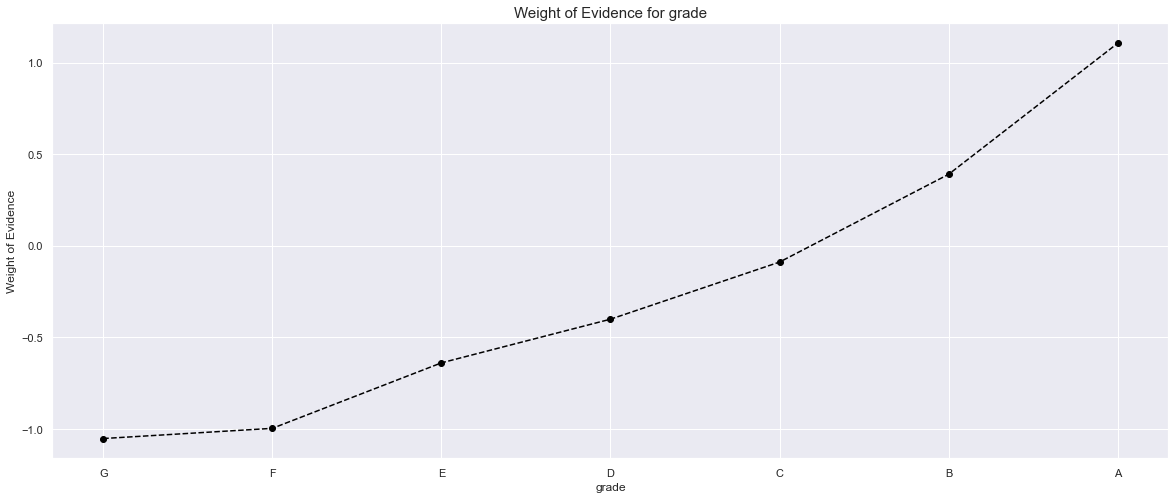

In [168]:
plot_by_woe(df_temp)

### preprocessing discrete variables : creating dummy variables

In [169]:
#for home ownership column
df_temp = woe_discrete(inputs_prep, 'home_ownership', targets_prep)
df_temp

,home_ownership,total_obs,good_obs,bad_obs,total_obs_%,good_obs_%,bad_obs_%,WoE,good_%_diff,WoE_diff,Info_value
0,RENT,37555,32862,4693,40.270435,39.551314,46.145526,-0.154201,NaN,NaN,1.910085
1,OTHER,41,36,5,0.043965,0.043328,0.049164,-0.126365,39.507986,0.027836,1.910085
2,OWN,8312,7410,902,8.913004,8.918363,8.869223,0.005525,8.875035,0.131890,1.910085
3,MORTGAGE,47336,42767,4569,50.758656,51.472553,44.926254,0.136026,42.554190,0.130501,1.910085
4,NONE,13,12,1,0.013940,0.014443,0.009833,0.384461,51.458110,0.248434,1.910085


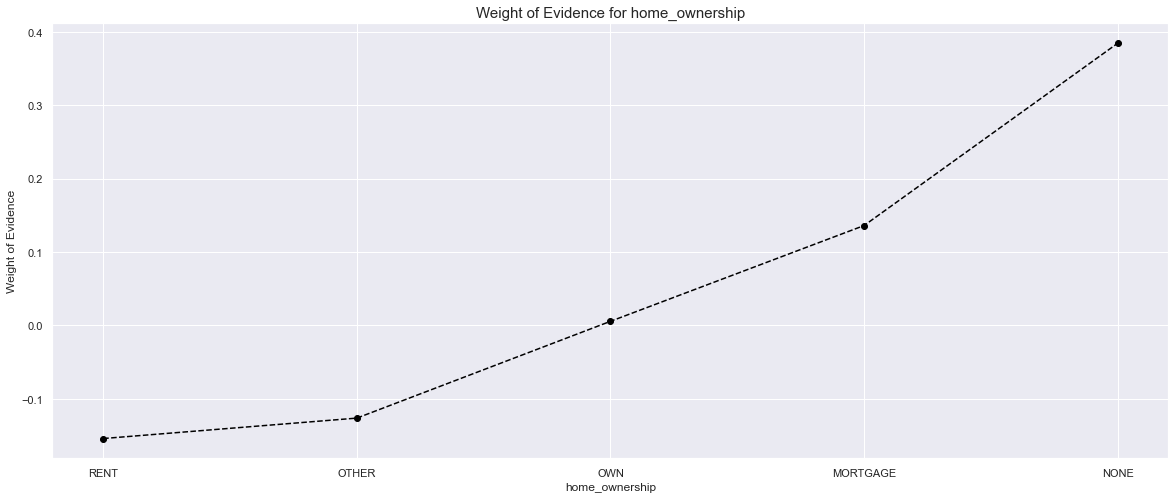

In [170]:
plot_by_woe(df_temp)

In [172]:
if ['home_ownership:ANY'] in inputs_prep.columns.values:
    pass
else:
    inputs_prep['home_ownership:ANY'] = np.where(inputs_prep['home_ownership']=='ANY',1,0)

In [173]:
# we see that other, none and any categories are heavily underrepresented 
# so it is best to combine these 3 categories with the riskiest category having enough representation i.e., the rent category

inputs_prep['home_ownership:RENT_OTHER_ANY_NONE'] = inputs_prep['home_ownership:RENT'] + inputs_prep['home_ownership:OTHER'] + inputs_prep['home_ownership:NONE'] + inputs_prep['home_ownership:ANY']

In [174]:
#looking at some advanced methods for creating dummies
(df['addr_state'].unique()) #total 50 categories

array(['AZ', 'GA', 'IL', 'CA', 'OR', 'NC', 'TX', 'VA', 'MO', 'CT', 'UT',
       'FL', 'NY', 'PA', 'MN', 'NJ', 'KY', 'OH', 'SC', 'RI', 'LA', 'MA',
       'WA', 'WI', 'AL', 'CO', 'KS', 'NV', 'AK', 'MD', 'WV', 'VT', 'MI',
       'DC', 'SD', 'NH', 'AR', 'NM', 'MT', 'HI', 'WY', 'OK', 'DE', 'MS',
       'TN', 'IA', 'NE', 'ID', 'IN', 'ME'], dtype=object)

In [175]:
df_temp = woe_discrete(inputs_prep, 'addr_state', targets_prep)

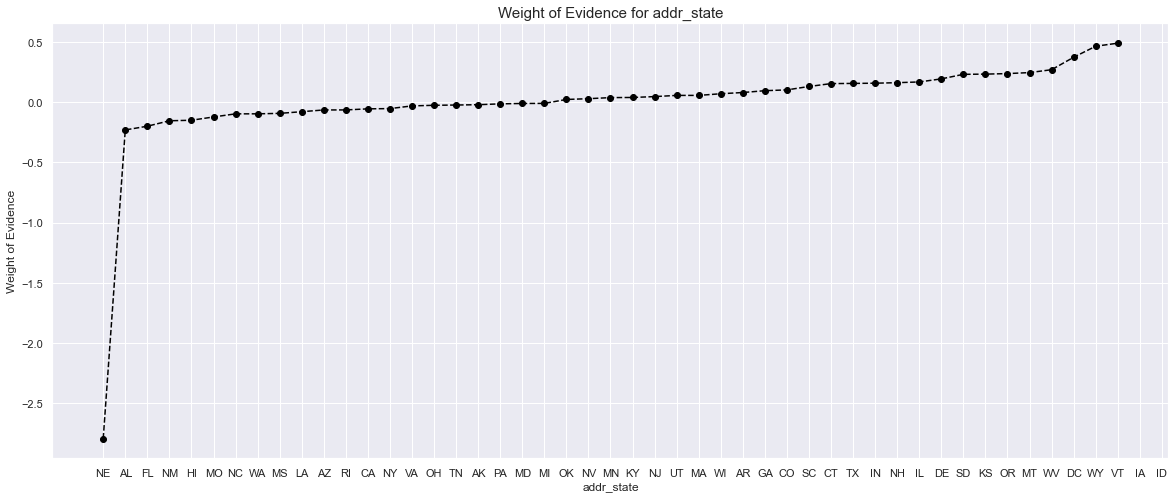

In [176]:
plot_by_woe(df_temp)

In [182]:
if ['addr_state:ND'] in inputs_prep.columns.values:
    pass
else:
    inputs_prep['addr_state:ND'] = np.where(inputs_prep['addr_state']=='ND',1,0)
    
if ['addr_state:AK'] in inputs_prep.columns.values:
    pass
else:
    inputs_prep['addr_state:AK'] = np.where(inputs_prep['addr_state']=='AK',1,0)

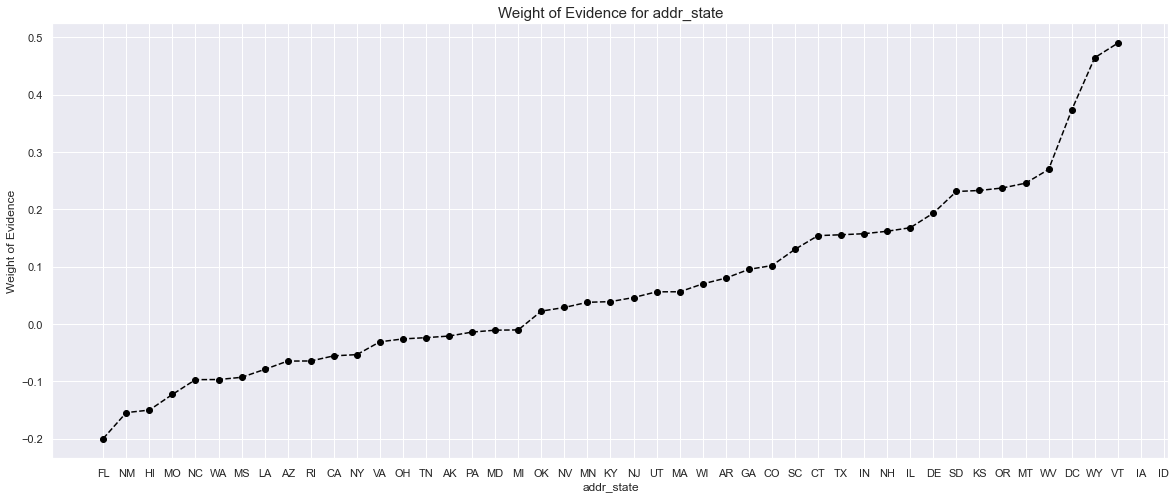

In [178]:
plot_by_woe(df_temp.iloc[2:-1])

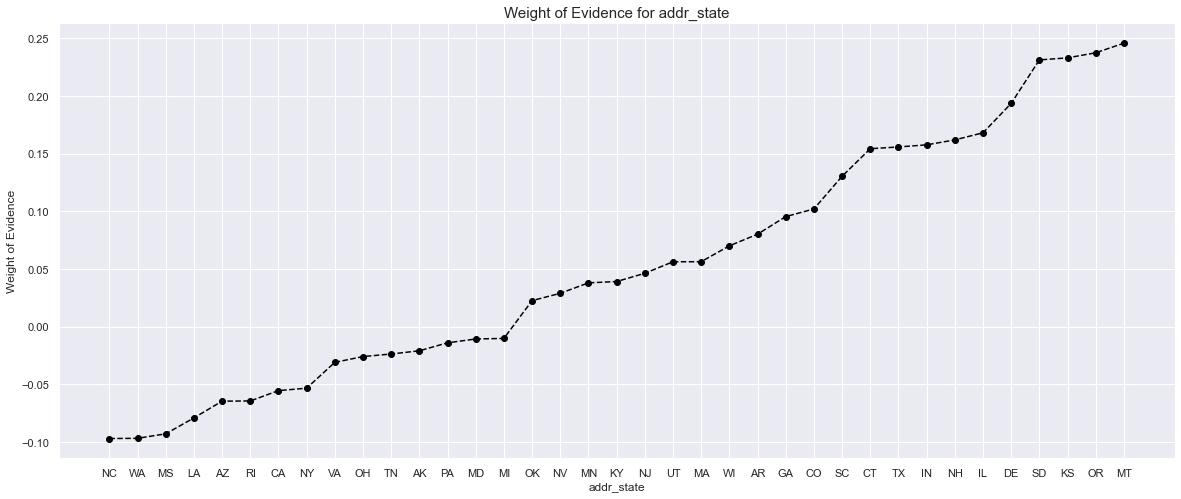

In [179]:
plot_by_woe(df_temp[6:43])

In [180]:
df_temp[36:]

,addr_state,total_obs,good_obs,bad_obs,total_obs_%,good_obs_%,bad_obs_%,WoE,good_%_diff,WoE_diff,Info_value
36,NH,456,413,43,0.488971,0.497069,0.422812,0.161801,0.953218,0.004295,inf
37,IL,3679,3334,345,3.945012,4.012661,3.392330,0.167938,3.515592,0.006136,inf
38,DE,251,228,23,0.269149,0.274411,0.226155,0.193405,3.738250,0.025468,inf
39,SD,192,175,17,0.205883,0.210623,0.167158,0.231127,0.063789,0.037721,inf
40,KS,905,825,80,0.970437,0.992935,0.786627,0.232911,0.782313,0.001784,inf
41,OR,1238,1129,109,1.327514,1.358817,1.071780,0.237294,0.365882,0.004383,inf
42,MT,309,282,27,0.331342,0.339403,0.265487,0.245624,1.019413,0.008331,inf
43,WV,503,460,43,0.539370,0.553637,0.422812,0.269580,0.214233,0.023956,inf
44,DC,283,261,22,0.303462,0.314129,0.216323,0.373032,0.239508,0.103452,inf
45,WY,224,208,16,0.240196,0.250340,0.157325,0.464503,0.063789,0.091471,inf


In [183]:
# now we have to create dummy variables by combining existing variables based on no. of observations and weight of evidence
inputs_prep['addr_state:NE_IA_NV_ND_HI_ID_FL'] = sum([inputs_prep['addr_state:NE'],inputs_prep['addr_state:IA'],
                                                     inputs_prep['addr_state:NV'],inputs_prep['addr_state:ND'],
                                                     inputs_prep['addr_state:HI'],inputs_prep['addr_state:ID'],
                                                     inputs_prep['addr_state:FL']]) #adding ND to the this category as it is absent

inputs_prep['addr_state:AL_OK'] = sum([inputs_prep['addr_state:AL'],inputs_prep['addr_state:OK']])

#separate category for NY as it hhas substantial number of observations(that category is already present)
inputs_prep['addr_state:NJ_LA_MD'] = sum([inputs_prep['addr_state:NJ'],inputs_prep['addr_state:LA'],inputs_prep['addr_state:MD']])

inputs_prep['addr_state:VA_NC_MO'] = sum([inputs_prep['addr_state:VA'],inputs_prep['addr_state:NC'],inputs_prep['addr_state:MO']])

#Separate category already exists for CA
inputs_prep['addr_state:NM_UT_AR_SD_DE_MI'] = sum([inputs_prep['addr_state:NM'],inputs_prep['addr_state:UT'],
                                                  inputs_prep['addr_state:AR'],inputs_prep['addr_state:SD'],
                                                  inputs_prep['addr_state:DE'],inputs_prep['addr_state:MI']])

inputs_prep['addr_state:TN_AZ'] = sum([inputs_prep['addr_state:TN'],inputs_prep['addr_state:AZ']])

#Separate category for PA
inputs_prep['addr_state:KY_IN'] = sum([inputs_prep['addr_state:KY'],inputs_prep['addr_state:IN']])
                                                                     
inputs_prep['addr_state:MN_RI_OH_MA'] = sum([inputs_prep['addr_state:MN'],inputs_prep['addr_state:RI'],
                                            inputs_prep['addr_state:OH'],inputs_prep['addr_state:MA']])

inputs_prep['addr_state:GA_OR'] = sum([inputs_prep['addr_state:GA'],inputs_prep['addr_state:OR']])

inputs_prep['addr_state:WI_WA'] = sum([inputs_prep['addr_state:WI'],inputs_prep['addr_state:WA']])

#Separate category for TX
inputs_prep['addr_state:MT_IL_CT'] = sum([inputs_prep['addr_state:MT'],inputs_prep['addr_state:IL'],inputs_prep['addr_state:CT']])

inputs_prep['addr_state:VT_SC_KS_CO'] = sum([inputs_prep['addr_state:VT'],inputs_prep['addr_state:SC'],
                                            inputs_prep['addr_state:KS'],inputs_prep['addr_state:CO']])

inputs_prep['addr_state:AK_NH_WV_MS_WY_DC_ME'] = sum([inputs_prep['addr_state:AK'],inputs_prep['addr_state:DC'],
                                                     inputs_prep['addr_state:NH'],inputs_prep['addr_state:WY'],
                                                     inputs_prep['addr_state:WV'],inputs_prep['addr_state:MS'],
                                                     inputs_prep['addr_state:ME']])


In [184]:
#working with verification status column
df['verification_status'].unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [185]:
df_temp = woe_discrete(inputs_prep, 'verification_status', targets_prep)
df_temp

,verification_status,total_obs,good_obs,bad_obs,total_obs_%,good_obs_%,bad_obs_%,WoE,good_%_diff,WoE_diff,Info_value
0,Verified,33589,29353,4236,36.017672,35.328030,41.651917,-0.164671,NaN,NaN,1.868456
1,Source Verified,29864,26751,3113,32.023333,32.196372,30.609636,0.050539,3.131657,0.215210,1.868456
2,Not Verified,29804,26983,2821,31.958995,32.475598,27.738446,0.157670,0.279225,0.107131,1.868456


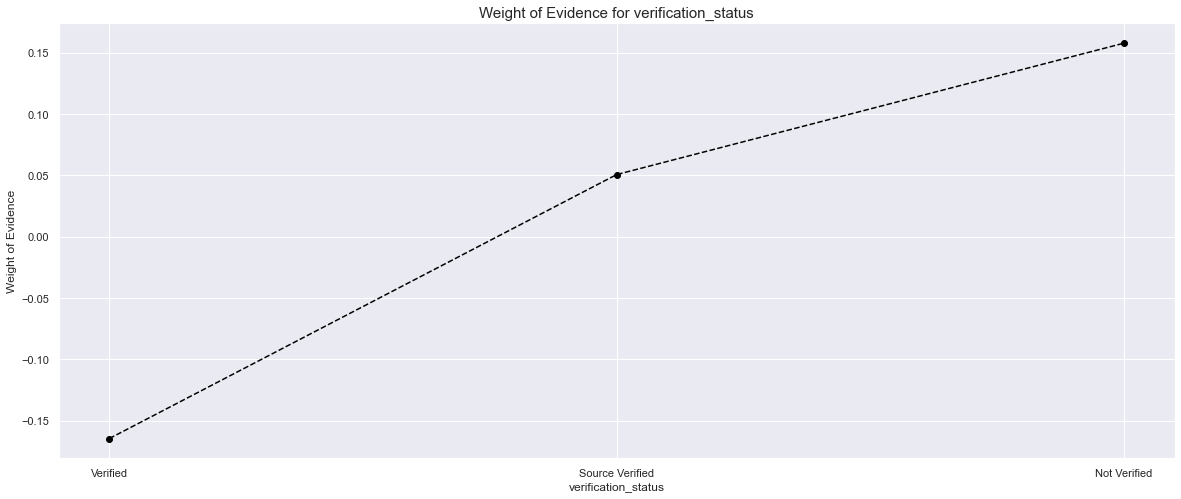

In [186]:
plot_by_woe(df_temp)

In [187]:
#checking purpose column
df['purpose'].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [188]:
df_temp = woe_discrete(inputs_prep, 'purpose', targets_prep)
df_temp

,purpose,total_obs,good_obs,bad_obs,total_obs_%,good_obs_%,bad_obs_%,WoE,good_%_diff,WoE_diff,Info_value
0,small_business,1462,1155,307,1.567711,1.390109,3.018682,-0.775438,NaN,NaN,3.446469
1,educational,93,75,18,0.099724,0.090267,0.176991,-0.673330,1.299842,0.102108,3.446469
2,renewable_energy,57,47,10,0.061121,0.056567,0.098328,-0.552884,0.033700,0.120446,3.446469
3,house,463,386,77,0.496477,0.464573,0.757129,-0.488414,0.408006,0.064469,3.446469
4,medical,915,791,124,0.981160,0.952014,1.219272,-0.247430,0.487441,0.240984,3.446469
5,other,4662,4048,614,4.999089,4.872002,6.037365,-0.214463,3.919987,0.032967,3.446469
6,wedding,492,433,59,0.527574,0.521140,0.580138,-0.107246,4.350861,0.107217,3.446469
7,debt_consolidation,55129,48852,6277,59.115133,58.796202,61.720747,-0.048543,58.275061,0.058703,3.446469
8,vacation,480,427,53,0.514707,0.513919,0.521141,-0.013954,58.282282,0.034589,3.446469
9,moving,596,532,64,0.639094,0.640293,0.629302,0.017314,0.126374,0.031268,3.446469


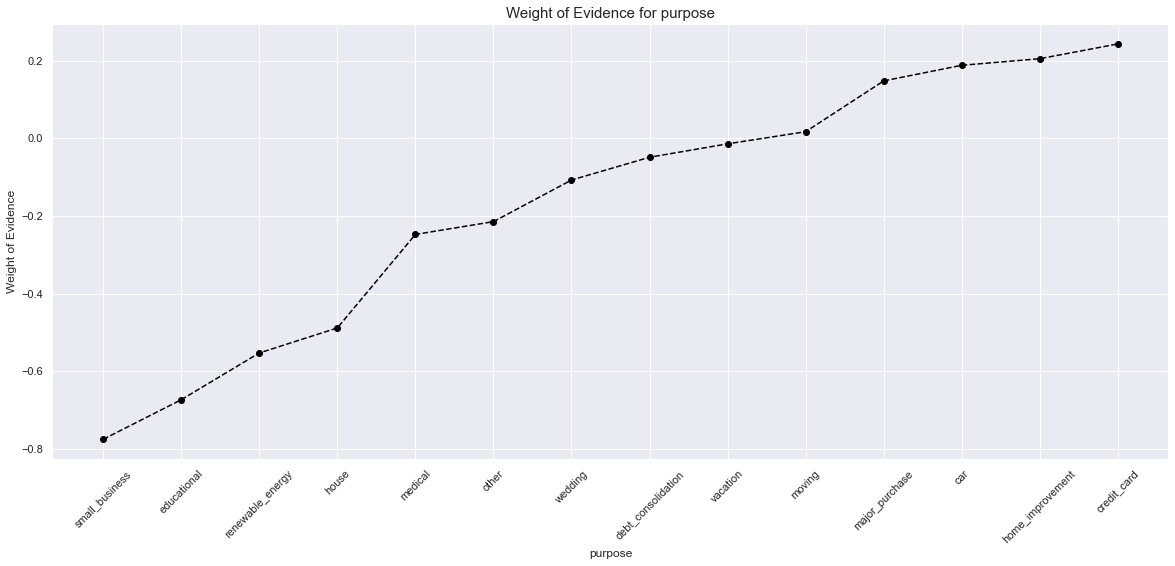

In [189]:
plot_by_woe(df_temp,rotation=45)

In [191]:
if ['purpose:car'] in inputs_prep.columns.values:
    pass
else:
    inputs_prep['purpose:car'] = np.where(inputs_prep['purpose']=='car',1,0)

In [192]:
#combining categories
inputs_prep['purpose:small-business_educational_moving_renewable-energy_other'] = sum([inputs_prep['purpose:small_business'],
                                                                                        inputs_prep['purpose:educational'],
                                                                                        inputs_prep['purpose:moving'],
                                                                                        inputs_prep['purpose:renewable_energy'],
                                                                                      inputs_prep['purpose:other']])

inputs_prep['purpose:house_medical_wedding_vacation'] = sum([inputs_prep['purpose:house'],inputs_prep['purpose:medical'],
                                                            inputs_prep['purpose:wedding'],inputs_prep['purpose:vacation']])

#separate category for debt consolidation
inputs_prep['purpose:home-improvement_major-purchase_car'] = sum([inputs_prep['purpose:home_improvement'],inputs_prep['purpose:car'],
                                                                 inputs_prep['purpose:major_purchase']])
#separate category for credit card

In [193]:
#checking initial list status column
df['initial_list_status'].unique()

array(['f', 'w'], dtype=object)

In [194]:
df_temp = woe_discrete(inputs_prep,'initial_list_status',targets_prep)
df_temp

,initial_list_status,total_obs,good_obs,bad_obs,total_obs_%,good_obs_%,bad_obs_%,WoE,good_%_diff,WoE_diff,Info_value
0,f,60620,53311,7309,65.003163,64.162865,71.86824,-0.113410,NaN,NaN,2.739224
1,w,32637,29776,2861,34.996837,35.837135,28.13176,0.242085,28.325731,0.355495,2.739224


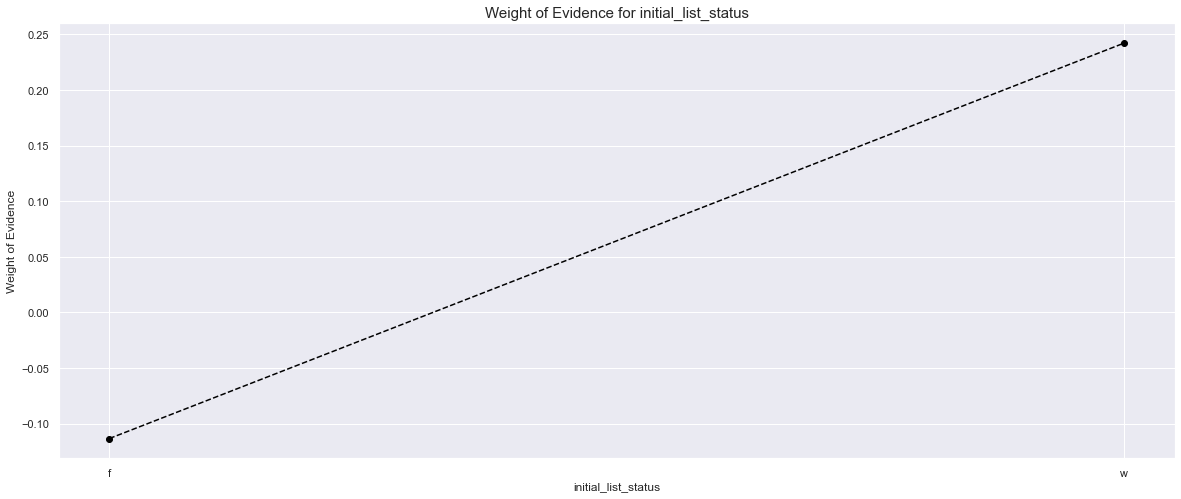

In [195]:
plot_by_woe(df_temp)

### Preprocessing continuous variables: 

In [196]:
#checking the term_int variable
inputs_prep['term_int'].unique()

array([60., 36.])

In [197]:
df_temp = woe_ordered_continuous(inputs_prep,'term_int',targets_prep)
#df_temp

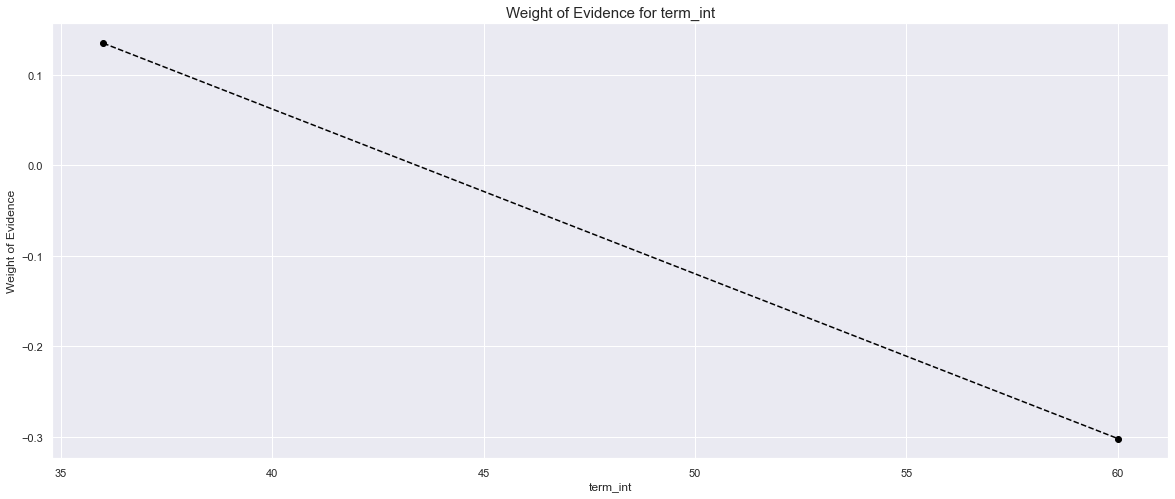

In [198]:
plot_by_woe(df_temp)

In [199]:
#creating dummies for term_int variable
inputs_prep['term_int:36'] = np.where(inputs_prep['term_int'] == 36,1,0)
inputs_prep['term_int:60'] = np.where(inputs_prep['term_int'] == 60,1,0)

In [200]:
#checking the emp_length_int variable
df['emp_length_int'].unique()

array([10.,  0.,  1.,  3.,  8.,  9.,  4.,  5.,  6.,  2.,  7.])

In [201]:
df_temp = woe_ordered_continuous(inputs_prep, 'emp_length_int',targets_prep)
#df_temp

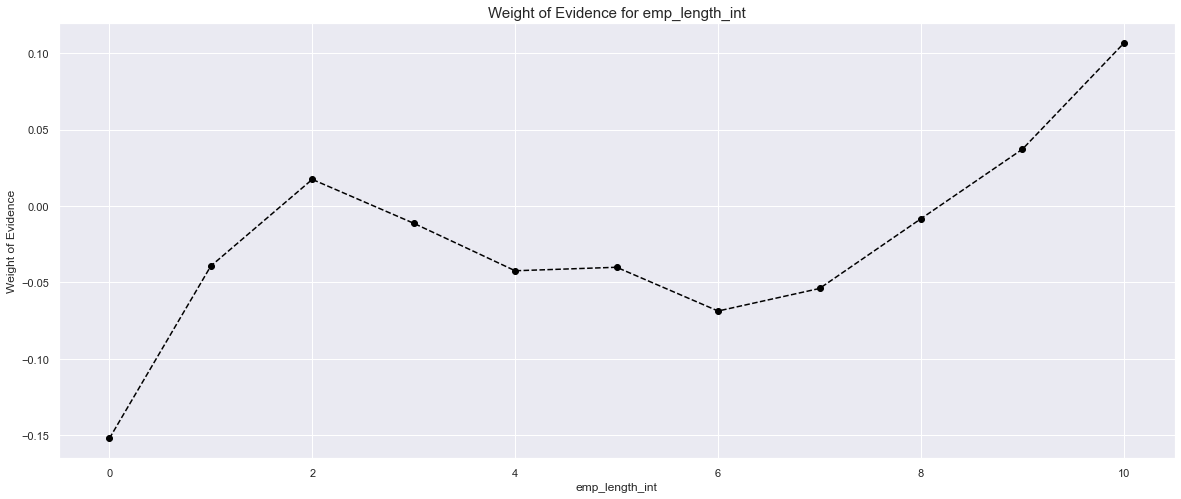

In [202]:
plot_by_woe(df_temp)

In [203]:
#creating dummies for emp_length_int variable
inputs_prep['emp_length_int:0'] = np.where(inputs_prep['emp_length_int'].isin([0]),1,0)
inputs_prep['emp_length_int:1'] = np.where(inputs_prep['emp_length_int'].isin([1]),1,0)
inputs_prep['emp_length_int:2_3_4'] = np.where(inputs_prep['emp_length_int'].isin([2,3,4]),1,0)
inputs_prep['emp_length_int:5_6'] = np.where(inputs_prep['emp_length_int'].isin([5,6]),1,0)
inputs_prep['emp_length_int:7_8'] = np.where(inputs_prep['emp_length_int'].isin([7,8]),1,0)
inputs_prep['emp_length_int:9'] = np.where(inputs_prep['emp_length_int'].isin([9]),1,0)
inputs_prep['emp_length_int:10'] = np.where(inputs_prep['emp_length_int'].isin([10]),1,0)

In [204]:
df['months_since_issue_date'].unique()

array([ 72.,  73.,  74.,  75.,  76.,  77.,  78.,  79.,  80.,  81.,  82.,
        83.,  84.,  85.,  86.,  87.,  88.,  89.,  90.,  91.,  92.,  93.,
        94.,  95.,  96.,  97.,  98.,  99., 100., 101., 102., 103., 104.,
       105., 106., 107., 108., 109., 110., 111., 112., 113., 114., 115.,
       116., 117., 118., 119., 120., 121., 122., 123., 124., 125., 126.,
        48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,  56.,  57.,  58.,
        59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.,  69.,
        70.,  71.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.])

In [205]:
inputs_prep['months_since_issue_date_factor'] = pd.cut(inputs_prep['months_since_issue_date'], 50)
x = list(inputs_prep['months_since_issue_date_factor'].unique())
y = []
for i in sorted(x):
    y.append(str(i))
    
"""this y is then passed as the labels argument. We had to do this because there was some difficulty plotting the graph
with entries on x axis being intervals and converting those intervals into str object solves that issue"""


'this y is then passed as the labels argument. We had to do this because there was some difficulty plotting the graph\nwith entries on x axis being intervals and converting those intervals into str object solves that issue'

In [206]:
#fine classing this variable using pd.cut
inputs_prep['months_since_issue_date_factor'] = pd.cut(inputs_prep['months_since_issue_date'], 50, labels = y)

In [207]:
df_temp = woe_ordered_continuous(inputs_prep, 'months_since_issue_date_factor', targets_prep)
#df_temp

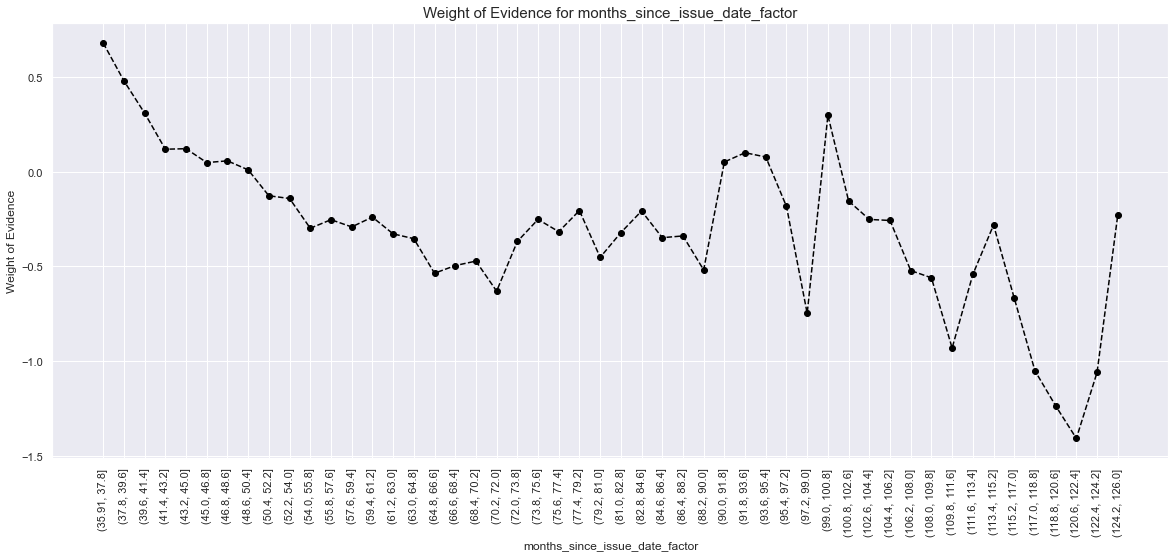

In [208]:
plot_by_woe(df_temp,90)

In [209]:
#creating dummies
inputs_prep['months_since_issue_date:<38'] = np.where(inputs_prep['months_since_issue_date'] < 38,1,0)
inputs_prep['months_since_issue_date:38-39'] = np.where(inputs_prep['months_since_issue_date'].isin(range(38,40)),1,0)
inputs_prep['months_since_issue_date:40-41'] = np.where(inputs_prep['months_since_issue_date'].isin(range(40,42)),1,0)
inputs_prep['months_since_issue_date:42-43'] = np.where(inputs_prep['months_since_issue_date'].isin(range(42,44)),1,0)
inputs_prep['months_since_issue_date:44-48'] = np.where(inputs_prep['months_since_issue_date'].isin(range(44,49)),1,0)
inputs_prep['months_since_issue_date:49-52'] = np.where(inputs_prep['months_since_issue_date'].isin(range(49,53)),1,0)
inputs_prep['months_since_issue_date:53-59'] = np.where(inputs_prep['months_since_issue_date'].isin(range(53,60)),1,0)
inputs_prep['months_since_issue_date:60-64'] = np.where(inputs_prep['months_since_issue_date'].isin(range(60,65)),1,0)
inputs_prep['months_since_issue_date:65-84'] = np.where(inputs_prep['months_since_issue_date'].isin(range(65,85)),1,0)
inputs_prep['months_since_issue_date:>84'] = np.where(inputs_prep['months_since_issue_date']>84,1,0)

In [210]:
#working on interest rate column
inputs_prep['int_rate_factor'] = pd.cut(inputs_prep['int_rate'],50)

In [211]:
a = list(inputs_prep['int_rate_factor'].unique())
b = []
for i in sorted(a):
    b.append(str(i))
    
inputs_prep['int_rate_factor'] = pd.cut(inputs_prep['int_rate'], 50, labels = b)

In [212]:
df_temp = woe_ordered_continuous(inputs_prep, 'int_rate_factor', targets_prep)
#df_temp

In [213]:
#plot_by_woe(df_temp,90)

In [214]:
#creating dummies
inputs_prep['int_rate:<=9.548'] = np.where(inputs_prep['int_rate'] <= 9.548,1,0)
inputs_prep['int_rate:9.548-12.025'] = np.where((inputs_prep['int_rate'] > 9.548) & (inputs_prep['int_rate']<=12.025),1,0)
inputs_prep['int_rate:12.025-15.74'] = np.where((inputs_prep['int_rate'] > 12.025) & (inputs_prep['int_rate']<=15.74),1,0)
inputs_prep['int_rate:15.74-20.281'] = np.where((inputs_prep['int_rate'] > 15.74) & (inputs_prep['int_rate']<=20.281),1,0)
inputs_prep['int_rate:>20.281'] = np.where(inputs_prep['int_rate'] > 20.281,1,0)

In [215]:
#working on funded_amnt column
inputs_prep['funded_amnt_factor'] = pd.cut(inputs_prep['funded_amnt'],50)

In [216]:
c = list(inputs_prep['funded_amnt_factor'].unique())
d = []
for i in sorted(c):
    d.append(str(i))
    
inputs_prep['funded_amnt_factor'] = pd.cut(inputs_prep['funded_amnt'],50, labels = d)

In [217]:
df_temp = woe_ordered_continuous(inputs_prep, 'funded_amnt_factor',targets_prep)
#df_temp

In [218]:
#plot_by_woe(df_temp,90)

Since the weight of evidence fluctuates rapidly and the common trend line is nearly horizontal, we conclude that
there is no clear cut association between funded_amnt and weight of evidence. Hence, we shall not include this column in our model

In [219]:
#preprocessing months_since_earliest_cr_line column
inputs_prep['months_since_earliest_cr_line_factor']=pd.cut(inputs_prep['months_since_earliest_cr_line'],50)

In [220]:
df_temp = woe_ordered_continuous(inputs_prep,'months_since_earliest_cr_line_factor',targets_prep)
#df_temp

In [221]:
x = list(df_temp.iloc[:,0])
y = []
for i in x:
    y.append(str(i))
len(y)

inputs_prep['months_since_earliest_cr_line_factor'] = pd.cut(inputs_prep['months_since_earliest_cr_line'],50,labels = y)

In [222]:
df_temp = woe_ordered_continuous(inputs_prep, 'months_since_earliest_cr_line_factor',targets_prep)
#df_temp

In [223]:
#plot_by_woe(df_temp[8:],90)

In [224]:
#creating dummies
inputs_prep['months_since_earliest_cr_line:<142'] = np.where(inputs_prep['months_since_earliest_cr_line']<142,1,0)
inputs_prep['months_since_earliest_cr_line:142-230'] = np.where(inputs_prep['months_since_earliest_cr_line'].isin(range(142,231)),1,0)
inputs_prep['months_since_earliest_cr_line:231-266'] = np.where(inputs_prep['months_since_earliest_cr_line'].isin(range(231,267)),1,0)
inputs_prep['months_since_earliest_cr_line:267-354'] = np.where(inputs_prep['months_since_earliest_cr_line'].isin(range(267,355)),1,0)
inputs_prep['months_since_earliest_cr_line:355-549'] = np.where(inputs_prep['months_since_earliest_cr_line'].isin(range(355,550)),1,0)
inputs_prep['months_since_earliest_cr_line:>=550'] = np.where(inputs_prep['months_since_earliest_cr_line']>=550,1,0)

In [225]:
#working on installment column
inputs_prep['installment_factor'] = pd.cut(inputs_prep['installment'],50)

In [226]:
x = list(inputs_prep['installment_factor'].unique())
y = []
for i in sorted(x):
    y.append(str(i))

inputs_prep['installment_factor'] = pd.cut(inputs_prep['installment'], 50, labels =y)

In [227]:
df_temp = woe_ordered_continuous(inputs_prep, 'installment_factor', targets_prep)
#df_temp

In [228]:
#plot_by_woe(df_temp,90)

Not enough importance seems to be available in this column and hence, we are not creating dummies

In [229]:
#working on delinq_2yrs column
len(inputs_prep['delinq_2yrs'].unique())
#no need for fine classing

18

In [230]:
df_temp = woe_ordered_continuous(inputs_prep, 'delinq_2yrs',targets_prep)
#df_temp

In [231]:
#plot_by_woe(df_temp)

In [232]:
#creating dummies
inputs_prep['delinq_2yrs:0'] = np.where(inputs_prep['delinq_2yrs']==0,1,0)
inputs_prep['delinq_2yrs:1-3'] = np.where((inputs_prep['delinq_2yrs']>0) & (inputs_prep['delinq_2yrs']<=3),1,0)
inputs_prep['delinq_2yrs:>3'] = np.where(inputs_prep['delinq_2yrs']>3,1,0)

In [233]:
#working on inq_last_6mths column
inputs_prep['inq_last_6mths'].unique()
#no need for fine classing

array([ 2.,  0.,  1.,  3.,  5.,  6.,  4.,  8.,  7., 14., 15., 12., 19.,
       10.,  9., 11., 24., 13., 17., 20.])

In [234]:
df_temp = woe_ordered_continuous(inputs_prep,'inq_last_6mths',targets_prep)
#df_temp

In [235]:
#plot_by_woe(df_temp)

In [236]:
#creating dummies
inputs_prep['inq_last_6mths:0'] = np.where(inputs_prep['inq_last_6mths']==0,1,0)
inputs_prep['inq_last_6mths:1'] = np.where(inputs_prep['inq_last_6mths']==1,1,0)
inputs_prep['inq_last_6mths:2'] = np.where(inputs_prep['inq_last_6mths']==2,1,0)
inputs_prep['inq_last_6mths:3-5'] = np.where(inputs_prep['inq_last_6mths'].isin(range(3,6)),1,0)
inputs_prep['inq_last_6mths:>=6'] = np.where(inputs_prep['inq_last_6mths']>=6,1,0)

In [237]:
#working on open_acc column
len(inputs_prep['open_acc'].unique())

54

In [238]:
df_temp = woe_ordered_continuous(inputs_prep,'open_acc',targets_prep)
#df_temp

In [239]:
#plot_by_woe(df_temp)

In [240]:
#plot_by_woe(df_temp[4:31])

In [241]:
#creating dummies
inputs_prep['open_acc:0'] = np.where((inputs_prep['open_acc'] == 0), 1, 0)
inputs_prep['open_acc:1-3'] = np.where((inputs_prep['open_acc'] >= 1) & (inputs_prep['open_acc'] <= 3), 1, 0)
inputs_prep['open_acc:4-12'] = np.where((inputs_prep['open_acc'] >= 4) & (inputs_prep['open_acc'] <= 12), 1, 0)
inputs_prep['open_acc:13-17'] = np.where((inputs_prep['open_acc'] >= 13) & (inputs_prep['open_acc'] <= 17), 1, 0)
inputs_prep['open_acc:18-22'] = np.where((inputs_prep['open_acc'] >= 18) & (inputs_prep['open_acc'] <= 22), 1, 0)
inputs_prep['open_acc:23-25'] = np.where((inputs_prep['open_acc'] >= 23) & (inputs_prep['open_acc'] <= 25), 1, 0)
inputs_prep['open_acc:26-30'] = np.where((inputs_prep['open_acc'] >= 26) & (inputs_prep['open_acc'] <= 30), 1, 0)
inputs_prep['open_acc:>=31'] = np.where((inputs_prep['open_acc'] >= 31), 1, 0)

In [242]:
#working on pub_rec column
inputs_prep['pub_rec'].unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  7.,  6., 34.,  9., 12.,  8., 17.,
       13., 10., 19., 11.])

In [243]:
df_temp = woe_ordered_continuous(inputs_prep,'pub_rec',targets_prep)
#df_temp

In [244]:
#plot_by_woe(df_temp[1:])

In [245]:
#creating dummies
inputs_prep['pub_rec:0']=np.where(inputs_prep['pub_rec']==0,1,0)
inputs_prep['pub_rec:1-2']=np.where((inputs_prep['pub_rec'].isin(range(1,3))),1,0)
inputs_prep['pub_rec:3-5']=np.where((inputs_prep['pub_rec'].isin(range(3,6))),1,0)
inputs_prep['pub_rec:>=6']=np.where(inputs_prep['pub_rec']>=6,1,0)

In [246]:
#working on total_acc column
sorted(inputs_prep['total_acc'].unique())

[0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 85.0,
 86.0,
 87.0,
 88.0,
 89.0,
 90.0,
 91.0,
 92.0,
 93.0,
 94.0,
 95.0,
 98.0,
 99.0,
 102.0]

In [247]:
#fine classing
inputs_prep['total_acc_factor'] = pd.cut(inputs_prep['total_acc'],50)

In [248]:
df_temp = woe_ordered_continuous(inputs_prep,'total_acc_factor',targets_prep)
#df_temp

In [249]:
x = list(df_temp.iloc[:,0])
y = []
for i in x:
    y.append(str(i))

inputs_prep['total_acc_factor'] = pd.cut(inputs_prep['total_acc'],50,labels = y)

In [250]:
df_temp = woe_ordered_continuous(inputs_prep,'total_acc_factor',targets_prep)
#df_temp[:9]

In [251]:
#plot_by_woe(df_temp[0:9],90)

In [252]:
#creating dummies
inputs_prep['total_acc:<=15'] = np.where(inputs_prep['total_acc']<=15,1,0)
inputs_prep['total_acc:16-28'] = np.where(inputs_prep['total_acc'].isin(range(16,29)),1,0)
inputs_prep['total_acc:29-49'] = np.where(inputs_prep['total_acc'].isin(range(29,50)),1,0)
inputs_prep['total_acc:>=50'] = np.where(inputs_prep['total_acc']>=50,1,0)

In [253]:
#working on acc_now_delinq column
inputs_prep['acc_now_delinq'].unique()

array([0., 1., 2., 4., 3., 5.])

In [254]:
df_temp = woe_ordered_continuous(inputs_prep, 'acc_now_delinq',targets_prep)
#df_temp

In [255]:
#plot_by_woe(df_temp)

In [256]:
#creating dummies
inputs_prep['acc_now_delinq:0'] = np.where(inputs_prep['acc_now_delinq']==0,1,0)
inputs_prep['acc_now_delinq:>=1'] = np.where(inputs_prep['acc_now_delinq']!=0,1,0)

### preprocessing the annual income column

In [257]:
#making fine classes
inputs_prep['annual_inc_factor'] = pd.cut(inputs_prep['annual_inc'],50)
df_temp = woe_ordered_continuous(inputs_prep,'annual_inc_factor',targets_prep)
#df_temp

In [258]:
#since more than 95% values lie in the first class itself, we probably need more classes to do anything useful
#let's try 100 fine classes
inputs_prep['annual_inc_factor'] = pd.cut(inputs_prep['annual_inc'],100)
df_temp = woe_ordered_continuous(inputs_prep,'annual_inc_factor',targets_prep)
#df_temp

In [259]:
#still more than 95% values are in the first 2 classes
#let's split the data into higher and lower income groups, where people earning more than 140k are in one group and rest in other
#first create a dummy for higher income

inputs_prep['annual_inc:>=140k'] = np.where(inputs_prep['annual_inc']>=140000,1,0)

In [260]:
#create a temp df for storing low income people
inputs_prep_temp = inputs_prep.loc[inputs_prep['annual_inc']<140000,:]

In [261]:
#make fine classes
inputs_prep_temp['annual_inc_factor'] = pd.cut(inputs_prep_temp['annual_inc'],50)
df_temp = woe_ordered_continuous(inputs_prep_temp,'annual_inc_factor',targets_prep[inputs_prep_temp.index])
#df_temp

In [262]:
#we won't be able to plot it just yet due to the issues of plotting intervals, so we convert them to string labels
x = list(inputs_prep_temp['annual_inc_factor'].unique())
y = []
for i in sorted(x):
    y.append(str(i))

inputs_prep_temp['annual_inc_factor'] = pd.cut(inputs_prep_temp['annual_inc'],50,labels = y)

In [263]:
df_temp = woe_ordered_continuous(inputs_prep_temp,'annual_inc_factor',targets_prep[inputs_prep_temp.index])
#df_temp

In [264]:
#plot_by_woe(df_temp,90)

In [265]:
#creating dummies
inputs_prep['annual_inc:<=20k'] = np.where(inputs_prep['annual_inc']<=20000,1,0)
dummies = list(range(20,110,10))
for i in range(8):
    inputs_prep['annual_inc:'+str(dummies[i])+'k-'+str(dummies[i+1])+'k'] = np.where((inputs_prep['annual_inc']>dummies[i]*1000)&(inputs_prep['annual_inc']<=dummies[i+1]*1000),1,0)
inputs_prep['annual_inc:100k-120k'] = np.where((inputs_prep['annual_inc']>100000)&(inputs_prep['annual_inc']<=120000),1,0)
inputs_prep['annual_inc:120k-140k'] = np.where((inputs_prep['annual_inc']>120000)&(inputs_prep['annual_inc']<=140000),1,0)

### preprocessing the mths_since_last_delinq column: contains missing values

In [266]:
#creating a temp df containing only those records where the concerned column is not null
inputs_prep_temp = inputs_prep[inputs_prep['mths_since_last_delinq'].isnull()==False]

In [267]:
#fine classing of temp df
inputs_prep_temp['mths_since_last_delinq_factor'] = pd.cut(inputs_prep['mths_since_last_delinq'],50)
df_temp = woe_ordered_continuous(inputs_prep_temp, 'mths_since_last_delinq_factor', targets_prep[inputs_prep_temp.index])
#df_temp

In [268]:
#we still can't plot this
x = list(df_temp.iloc[:,0])
y = []
for i in (x):
    y.append(str(i))

inputs_prep_temp['mths_since_last_delinq_factor'] = pd.cut(inputs_prep_temp['mths_since_last_delinq'],50,labels = y)

In [269]:
df_temp = woe_ordered_continuous(inputs_prep_temp, 'mths_since_last_delinq_factor', targets_prep[inputs_prep_temp.index])
#df_temp

In [270]:
#plot_by_woe(df_temp,90)

In [271]:
#creating dummies
inputs_prep['mths_since_last_delinq:Missing'] = np.where(inputs_prep['mths_since_last_delinq'].isnull(),1,0)
inputs_prep['mths_since_last_delinq:0-3'] = np.where((inputs_prep['mths_since_last_delinq']>=0)&(inputs_prep['mths_since_last_delinq']<=3),1,0)
inputs_prep['mths_since_last_delinq:4-30'] = np.where((inputs_prep['mths_since_last_delinq']>=4)&(inputs_prep['mths_since_last_delinq']<=30),1,0)
inputs_prep['mths_since_last_delinq:31-56'] = np.where((inputs_prep['mths_since_last_delinq']>=31)&(inputs_prep['mths_since_last_delinq']<=56),1,0)
inputs_prep['mths_since_last_delinq:>56'] = np.where((inputs_prep['mths_since_last_delinq']>56),1,0)

In [272]:
#working with 'dti' column
(inputs_prep['dti'].isnull().sum())
#no missing values

0

In [273]:
inputs_prep['dti_factor'] = pd.cut(inputs_prep['dti'],50)
df_temp = woe_ordered_continuous(inputs_prep,'dti_factor',targets_prep)
#df_temp

In [274]:
#we still can't plot this
x = list(df_temp.iloc[:,0])
y = []
for i in (x):
    y.append(str(i))


In [275]:
inputs_prep['dti_factor'] = pd.cut(inputs_prep['dti'],50,labels = y)
df_temp = woe_ordered_continuous(inputs_prep,'dti_factor',targets_prep)
#df_temp

In [276]:
#plot_by_woe(df_temp[11:44],90)

In [277]:
#creating dummies
inputs_prep['dti:<=1.4'] = np.where((inputs_prep['dti'] <= 1.4), 1, 0)
inputs_prep['dti:1.4-3.5'] = np.where((inputs_prep['dti'] > 1.4) & (inputs_prep['dti'] <= 3.5), 1, 0)
inputs_prep['dti:3.5-7.7'] = np.where((inputs_prep['dti'] > 3.5) & (inputs_prep['dti'] <= 7.7), 1, 0)
inputs_prep['dti:7.7-10.5'] = np.where((inputs_prep['dti'] > 7.7) & (inputs_prep['dti'] <= 10.5), 1, 0)
inputs_prep['dti:10.5-16.1'] = np.where((inputs_prep['dti'] > 10.5) & (inputs_prep['dti'] <= 16.1), 1, 0)
inputs_prep['dti:16.1-20.3'] = np.where((inputs_prep['dti'] > 16.1) & (inputs_prep['dti'] <= 20.3), 1, 0)
inputs_prep['dti:20.3-21.7'] = np.where((inputs_prep['dti'] > 20.3) & (inputs_prep['dti'] <= 21.7), 1, 0)
inputs_prep['dti:21.7-22.4'] = np.where((inputs_prep['dti'] > 21.7) & (inputs_prep['dti'] <= 22.4), 1, 0)
inputs_prep['dti:22.4-35'] = np.where((inputs_prep['dti'] > 22.4) & (inputs_prep['dti'] <= 35), 1, 0)
inputs_prep['dti:>35'] = np.where((inputs_prep['dti'] > 35), 1, 0)

In [278]:
#working on mths_since_last_record column
print(sorted(inputs_prep['mths_since_last_record'].unique()))
inputs_prep['mths_since_last_record'].isnull().sum()
#large amount of data missing, we shall create a separate category for this

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0]


80720

In [279]:
#creating a temp df containing only those records where the concerned column is not null
inputs_prep_temp = inputs_prep[inputs_prep['mths_since_last_record'].isnull()==False]

In [280]:
#fine classing of temp df
inputs_prep_temp['mths_since_last_record_factor'] = pd.cut(inputs_prep['mths_since_last_record'],50)
df_temp = woe_ordered_continuous(inputs_prep_temp, 'mths_since_last_record_factor', targets_prep[inputs_prep_temp.index])
#df_temp

In [281]:
#we still can't plot this
x = list(df_temp.iloc[:,0])
y = []
for i in (x):
    y.append(str(i))

inputs_prep_temp['mths_since_last_record_factor'] = pd.cut(inputs_prep_temp['mths_since_last_record'],50,labels = y)

In [282]:
df_temp = woe_ordered_continuous(inputs_prep_temp, 'mths_since_last_record_factor', targets_prep[inputs_prep_temp.index])
#df_temp

In [283]:
#plot_by_woe(df_temp,90)

In [284]:
#creating dummies
inputs_prep['mths_since_last_record:Missing'] = np.where((inputs_prep['mths_since_last_record'].isnull()), 1, 0)
inputs_prep['mths_since_last_record:0-2'] = np.where((inputs_prep['mths_since_last_record'] >= 0) & (inputs_prep['mths_since_last_record'] <= 2), 1, 0)
inputs_prep['mths_since_last_record:3-20'] = np.where((inputs_prep['mths_since_last_record'] >= 3) & (inputs_prep['mths_since_last_record'] <= 20), 1, 0)
inputs_prep['mths_since_last_record:21-31'] = np.where((inputs_prep['mths_since_last_record'] >= 21) & (inputs_prep['mths_since_last_record'] <= 31), 1, 0)
inputs_prep['mths_since_last_record:32-80'] = np.where((inputs_prep['mths_since_last_record'] >= 32) & (inputs_prep['mths_since_last_record'] <= 80), 1, 0)
inputs_prep['mths_since_last_record:81-86'] = np.where((inputs_prep['mths_since_last_record'] >= 81) & (inputs_prep['mths_since_last_record'] <= 86), 1, 0)
inputs_prep['mths_since_last_record:>86'] = np.where((inputs_prep['mths_since_last_record'] > 86), 1, 0)

In [285]:
#saving the preprocessed test data in X_train
X_test = inputs_prep

In [ ]:
#saving all the df to csv
X_train.to_csv('X_train.csv')
Y_train.to_csv('Y_train.csv')

In [ ]:
X_test.to_csv('X_test.csv')
Y_test.to_csv('Y_test.csv')